Importing Libraries

In [1]:
import numpy as np
from skimage import io
from skimage import exposure
from skimage.color import rgb2gray
import shutil
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import cm
from matplotlib import colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.patches as mpatches
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from PIL import Image
import glob
import os
import rasterio
from osgeo import gdal
import PIL
from PIL import TiffImagePlugin
from shapely.geometry import Point, Polygon, box
import torch
import fiona
import rasterio
import rasterio.mask
from rasterio.plot import show
from rasterio.warp import calculate_default_transform, reproject, Resampling

from rasterio.mask import mask
from rasterio.plot import show

import geopandas as gpd
from rasterio import plot
from rasterio.mask import mask
from rasterio.plot import show_hist
import geopandas as gpd
from rasterio.plot import show
from rasterio.plot import plotting_extent
import zipfile

import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import HTML
from rasterio.warp import calculate_default_transform, reproject, Resampling
from pathlib import Path


Creating Path shortcuts

In [2]:
data_path='./S2B_MSIL1C_20220408T092029_N0400_R093_T34TFL_20220408T101649.SAFE/'
data_path_full='./S2B_MSIL1C_20220408T092029_N0400_R093_T34TFL_20220408T101649.SAFE/GRANULE/L1C_T34TFL_A026574_20220408T092025/IMG_DATA/'

resampled='./S2B_MSIL1C_20220408T092029_N0400_R093_T34TFL_20220408T101649.SAFE/GRANULE/L1C_T34TFL_A026574_20220408T092025/IMG_DATA/resampled/'

Creating new folder

In [ ]:
os.mkdir(data_path_full+'/resampled')

Finding band Files

In [3]:

bandPath = data_path_full
bandNames = os.listdir(bandPath)
bandNames.remove('resampled')
bandNames


['Full Classification without Bricks.tif',
 'Full Classification.tif',
 'FullnPrediction.tif',
 'T34TFL_20220408T092029_B01.jp2',
 'T34TFL_20220408T092029_B01.tif',
 'T34TFL_20220408T092029_B02.jp2',
 'T34TFL_20220408T092029_B02.tif',
 'T34TFL_20220408T092029_B03.jp2',
 'T34TFL_20220408T092029_B03.tif',
 'T34TFL_20220408T092029_B04.jp2',
 'T34TFL_20220408T092029_B04.tif',
 'T34TFL_20220408T092029_B05.jp2',
 'T34TFL_20220408T092029_B05.tif',
 'T34TFL_20220408T092029_B06.jp2',
 'T34TFL_20220408T092029_B06.tif',
 'T34TFL_20220408T092029_B07.jp2',
 'T34TFL_20220408T092029_B07.tif',
 'T34TFL_20220408T092029_B08.jp2',
 'T34TFL_20220408T092029_B08.tif',
 'T34TFL_20220408T092029_B09.jp2',
 'T34TFL_20220408T092029_B09.tif',
 'T34TFL_20220408T092029_B10.jp2',
 'T34TFL_20220408T092029_B10.tif',
 'T34TFL_20220408T092029_B11.jp2',
 'T34TFL_20220408T092029_B11.tif',
 'T34TFL_20220408T092029_B12.jp2',
 'T34TFL_20220408T092029_B12.tif',
 'T34TFL_20220408T092029_B8A.jp2',
 'T34TFL_20220408T092029_B8A.t

In [4]:
lst = [os.path.splitext(x)[0] for x in bandNames]
lst

['Full Classification without Bricks',
 'Full Classification',
 'FullnPrediction',
 'T34TFL_20220408T092029_B01',
 'T34TFL_20220408T092029_B01',
 'T34TFL_20220408T092029_B02',
 'T34TFL_20220408T092029_B02',
 'T34TFL_20220408T092029_B03',
 'T34TFL_20220408T092029_B03',
 'T34TFL_20220408T092029_B04',
 'T34TFL_20220408T092029_B04',
 'T34TFL_20220408T092029_B05',
 'T34TFL_20220408T092029_B05',
 'T34TFL_20220408T092029_B06',
 'T34TFL_20220408T092029_B06',
 'T34TFL_20220408T092029_B07',
 'T34TFL_20220408T092029_B07',
 'T34TFL_20220408T092029_B08',
 'T34TFL_20220408T092029_B08',
 'T34TFL_20220408T092029_B09',
 'T34TFL_20220408T092029_B09',
 'T34TFL_20220408T092029_B10',
 'T34TFL_20220408T092029_B10',
 'T34TFL_20220408T092029_B11',
 'T34TFL_20220408T092029_B11',
 'T34TFL_20220408T092029_B12',
 'T34TFL_20220408T092029_B12',
 'T34TFL_20220408T092029_B8A',
 'T34TFL_20220408T092029_B8A',
 'T34TFL_20220408T092029_TCI',
 'T34TFL_20220408T092029_TCI']

Importing shapefile

In [ ]:
aoiFile = fiona.open('geometry_Polygon.shp')
aoiGeom = [aoiFile[0]['geometry']]
print(aoiFile.crs)

Cropping all bands with the shapefile

In [ ]:
import rasterio as rio
for band in lst:
    with rio.open(bandPath+band+'.jp2') as src:
        out_image, out_transform=mask(src,aoiGeom,crop=True)
        out_meta=src.meta.copy()
        out_meta.update({"driver": "GTiff",
                    "height": out_image.shape[1],
                    "width": out_image.shape[2],
                    "transform": out_transform}) 
    with rio.open(os.path.join(bandPath+band+'.tif'),'w',**out_meta) as dest:
        dest.write(out_image)
               

Resampling all bands to 10m resolution

In [ ]:
from osgeo import gdal, gdalconst
bandname='T34TFL_20220408T092029_'
bandlist=['B01','B05','B06','B07','B11','B12','B8A','B09','B10']
referenceFile = "B04.tif"
for ban in bandlist:
    #inputfile = 'B09.tif'
    input2 = gdal.Open(bandPath+bandname+ban+'.tif', gdalconst.GA_ReadOnly)
    inputProj = input2.GetProjection()
    inputTrans = input2.GetGeoTransform()

#referencefile = #Path to reference file
    reference = gdal.Open(bandPath+bandname+referenceFile, gdalconst.GA_ReadOnly)
    referenceProj = reference.GetProjection()
    referenceTrans = reference.GetGeoTransform()
    bandreference = reference.GetRasterBand(1)    
    x = reference.RasterXSize 
    y = reference.RasterYSize


    #outputfile = 'B01t.tif'
    driver= gdal.GetDriverByName('GTiff')
    output = driver.Create(bandPath+bandname+ban+'s.tif',x,y,1,bandreference.DataType)
    output.SetGeoTransform(referenceTrans)
    output.SetProjection(referenceProj)

    gdal.ReprojectImage(input2,output,inputProj,referenceProj,gdalconst.GRA_Bilinear)

    del output
    del reference


Moving resampled and cropped bands

In [ ]:

usedband=['B01s','B02','B03','B04','B05s','B06s','B07s','B08','B8As','B09s','B10s','B11s','B12s']
for name in usedband:
    shutil.move(data_path_full+bandname+name+'.tif', resampled+bandname+name+'.tif')
    
#resampled

In [5]:
import rasterio as rio
bandname='T34TFL_20220408T092029_'
bandlist=['B01','B05','B06','B07','B11','B12','B8A','B09','B10']
b2=rio.open(resampled+bandname+'B02.tif')
b3=rio.open(resampled+bandname+'B03.tif')
b4=rio.open(resampled+bandname+'B04.tif')
b8=rio.open(resampled+bandname+'B08.tif')
b9=rio.open(resampled+bandname+'B09s.tif')
b11=rio.open(resampled+bandname+'B11s.tif')
b12=rio.open(resampled+bandname+'B12s.tif')



In [ ]:
B2=b2.read()
B3=b3.read()
B4=b4.read()
B8=b8.read()
B9=b9.read()
B11=b11.read()
B12=b12.read()
# Normalized Difference Vegetation index
ndvi = (B8.astype(float)-B4.astype(float))/(B8+B4)
undvi=np.nan_to_num(ndvi)
meta = b4.meta 
meta.update(driver='GTiff')
meta.update(dtype=rio.float32)
with rio.open(os.path.join(resampled, 'undvi.tif'), 'w', **meta) as ds1t:
    ds1t.write(undvi.astype(rio.float32))
#Normalized Difference Water Index    
ndwi=(B3.astype(float)-B8.astype(float))/(B3+B8)
undwi=np.nan_to_num(ndwi)
meta = b4.meta 
meta.update(driver='GTiff')
meta.update(dtype=rio.float32)
with rio.open(os.path.join(resampled, 'undwi.tif'), 'w', **meta) as dst2:
    dst2.write(undwi.astype(rio.float32))
# Normalized Difference Built-up Index    
ndbi=(B11.astype(float)-B8.astype(float))/(B8+B11)
undbi=np.nan_to_num(ndbi)
meta = b4.meta 
meta.update(driver='GTiff')
meta.update(dtype=rio.float32)
with rio.open(os.path.join(resampled, 'undbi.tif'), 'w', **meta) as dst3:
    dst3.write(undbi.astype(rio.float32)) 
#Built-up Index    
bui=ndbi-ndvi  
bui[np.isinf(bui)]=10
ubui=np.nan_to_num(bui)
meta = b4.meta 
meta.update(driver='GTiff')
meta.update(dtype=rio.float32)
with rio.open(os.path.join(resampled, 'ubui.tif'), 'w', **meta) as dst4:
    dst4.write(ubui.astype(rio.float32))    
# Bare Soil Index    
bsi=((B11+B4)-(B8+B2))/((B11+B4)+(B8+B2))
bsi[np.isinf(bsi)]=10
ubsi=np.nan_to_num(bsi)
meta = b4.meta 
meta.update(driver='GTiff')
meta.update(dtype=rio.float32)
with rio.open(os.path.join(resampled, 'ubsi.tif'), 'w', **meta) as dst4:
    dst4.write(ubsi.astype(rio.float32)) 
# Green Chlorophyl  Index
gci=(B9/B3)-1
gci[np.isinf(gci)]=10
ugci=np.nan_to_num(gci)
meta = b4.meta 
meta.update(driver='GTiff')
meta.update(dtype=rio.float32)
with rio.open(os.path.join(resampled, 'ugci.tif'), 'w', **meta) as dst4:
    dst4.write(ugci.astype(rio.float32))
# Moisture Stress Index
msi=(B11/B8)
msi[np.isinf(msi)]=10
umsi=np.nan_to_num(msi)
meta = b4.meta 
meta.update(driver='GTiff')
meta.update(dtype=rio.float32)
with rio.open(os.path.join(resampled, 'umsi.tif'), 'w', **meta) as dst4:
    dst4.write(umsi.astype(rio.float32))

In [5]:
def composition(band1,band2,band3):
    im_comp=np.dstack([band1/band1.max(), band2/band2.max(), band3/band3.max()])
    for i in range(3):
        v_min, v_max = np.percentile(im_comp[:,:,i],(1,98))
        im_comp[:,:,i] = exposure.rescale_intensity(im_comp[:,:,i],in_range=(v_min,v_max))
    return im_comp

In [6]:


coll = io.ImageCollection(resampled + '*.tif')

# a list of loaded files
print(coll.files)

band_names=['B1','B2','B3','B4','B5','B6','B7','B8','B8A','B9','B10','B11','B12','BSI','BUI','GCI','MSI','NDBI','NDVI','NDWI']

['./S2B_MSIL1C_20220408T092029_N0400_R093_T34TFL_20220408T101649.SAFE/GRANULE/L1C_T34TFL_A026574_20220408T092025/IMG_DATA/resampled\\T34TFL_20220408T092029_B01s.tif', './S2B_MSIL1C_20220408T092029_N0400_R093_T34TFL_20220408T101649.SAFE/GRANULE/L1C_T34TFL_A026574_20220408T092025/IMG_DATA/resampled\\T34TFL_20220408T092029_B02.tif', './S2B_MSIL1C_20220408T092029_N0400_R093_T34TFL_20220408T101649.SAFE/GRANULE/L1C_T34TFL_A026574_20220408T092025/IMG_DATA/resampled\\T34TFL_20220408T092029_B03.tif', './S2B_MSIL1C_20220408T092029_N0400_R093_T34TFL_20220408T101649.SAFE/GRANULE/L1C_T34TFL_A026574_20220408T092025/IMG_DATA/resampled\\T34TFL_20220408T092029_B04.tif', './S2B_MSIL1C_20220408T092029_N0400_R093_T34TFL_20220408T101649.SAFE/GRANULE/L1C_T34TFL_A026574_20220408T092025/IMG_DATA/resampled\\T34TFL_20220408T092029_B05s.tif', './S2B_MSIL1C_20220408T092029_N0400_R093_T34TFL_20220408T101649.SAFE/GRANULE/L1C_T34TFL_A026574_20220408T092025/IMG_DATA/resampled\\T34TFL_20220408T092029_B06s.tif', './S2B

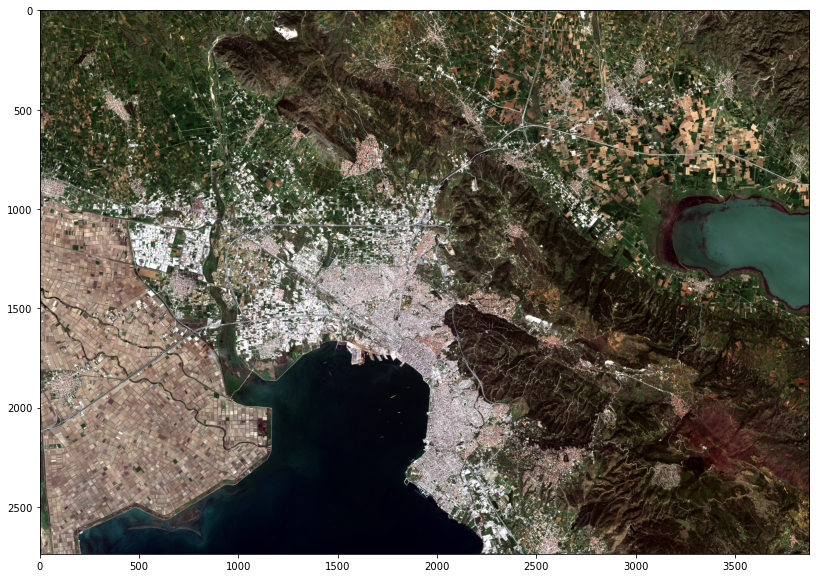

In [7]:
im_comp = composition(coll[3],coll[2],coll[1])
plt.figure(figsize=(20,10))
plt.imshow(im_comp)

In [8]:
trainpath='./rf_training/'
p_water = np.loadtxt(trainpath+'water.txt',dtype='int')
p_shallow_water=np.loadtxt(trainpath+'shallow_water.txt',dtype='int')
p_concrete = np.loadtxt(trainpath+'concrete.txt',dtype='int')
p_brick=np.loadtxt(trainpath+'brick.txt', dtype='int')
p_dry_soil_crop=np.loadtxt(trainpath+'dry_soil_and_dry_crop.txt', dtype='int')
p_wet_soil=np.loadtxt(trainpath+'wet_ soil.txt', dtype='int')
p_low_veg = np.loadtxt(trainpath+'low_vegetation.txt',dtype='int')
p_trees = np.loadtxt(trainpath+'tree_cover.txt',dtype='int')

LC_class_names = ['water', 'shallow water','concrete','brick','wet soil','dry soil and crop','low veg','tree cover']
#LC_class_names = ['water', 'artificial', 'low vegetation', 'tree cover']

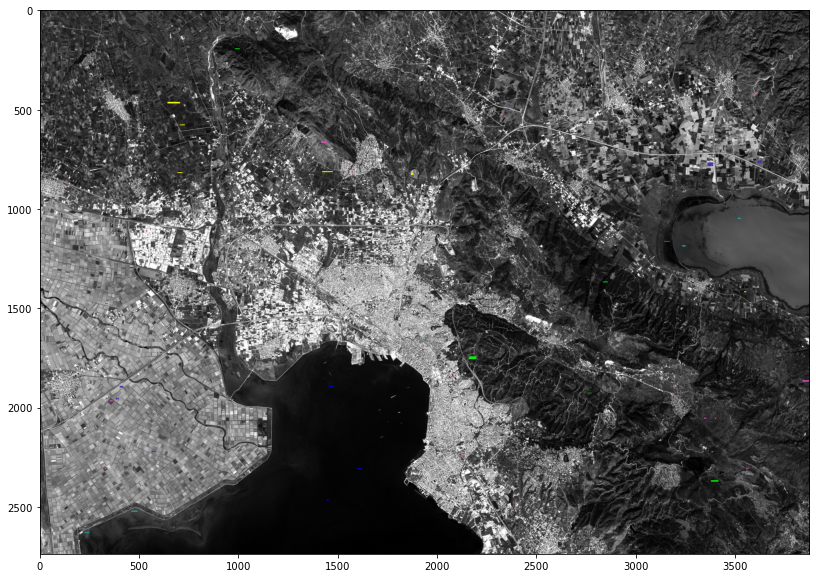

In [10]:
# marking the classes examples
im_comp_p=np.zeros(im_comp.shape)
im_comp_p[:,:,0]=rgb2gray(im_comp)
im_comp_p[:,:,1]=rgb2gray(im_comp)
im_comp_p[:,:,2]=rgb2gray(im_comp)

# marking in blue the training points for 'water' class
im_comp_p[p_water[:,1],p_water[:,0],0] =0
im_comp_p[p_water[:,1],p_water[:,0],1] =0
im_comp_p[p_water[:,1],p_water[:,0],2] =1

# marking in bright blue the training points for 'shallow water' class
im_comp_p[p_shallow_water[:,1],p_shallow_water[:,0],0] =0
im_comp_p[p_shallow_water[:,1],p_shallow_water[:,0],1] =1
im_comp_p[p_shallow_water[:,1],p_shallow_water[:,0],2] =1

# marking in white the training points for 'concrete' class
im_comp_p[p_concrete[:,1],p_concrete[:,0],0] =1
im_comp_p[p_concrete[:,1],p_concrete[:,0],1] =1
im_comp_p[p_concrete[:,1],p_concrete[:,0],2] =1

# marking in red the training points for 'brick' class
im_comp_p[p_brick[:,1],p_brick[:,0],0] =1
im_comp_p[p_brick[:,1],p_brick[:,0],1] =0
im_comp_p[p_brick[:,1],p_brick[:,0],2] =0

# marking in purple the training points for 'dry soil and crop' class
im_comp_p[p_dry_soil_crop[:,1],p_dry_soil_crop[:,0],0] =0.255
im_comp_p[p_dry_soil_crop[:,1],p_dry_soil_crop[:,0],1] =0.211
im_comp_p[p_dry_soil_crop[:,1],p_dry_soil_crop[:,0],2] =0.67

# marking in pink the training points for 'wet soil' class
im_comp_p[p_wet_soil[:,1],p_wet_soil[:,0],0] =0.82
im_comp_p[p_wet_soil[:,1],p_wet_soil[:,0],1] =0.3
im_comp_p[p_wet_soil[:,1],p_wet_soil[:,0],2] =0.7

# marking in yellow the training points for 'low vegetation' class
im_comp_p[p_low_veg[:,1],p_low_veg[:,0],0] =1
im_comp_p[p_low_veg[:,1],p_low_veg[:,0],1] =1
im_comp_p[p_low_veg[:,1],p_low_veg[:,0],2] =0

# marking in green the training points for 'tree cover' class
im_comp_p[p_trees[:,1],p_trees[:,0],0] =0
im_comp_p[p_trees[:,1],p_trees[:,0],1] =1
im_comp_p[p_trees[:,1],p_trees[:,0],2] =0



plt.figure(figsize=(20,10))
plt.imshow(im_comp_p)

Stacking the classes examples

In [9]:
bands=[]
for i in range(len(coll)):
    band = np.asarray(coll[i].data)[p_water[:,1],p_water[:,0]]
    bands.append(band)
X_water=np.stack(bands).T
print(X_water.shape)

bands=[]
for i in range(len(coll)):
    band = np.asarray(coll[i].data)[p_shallow_water[:,1],p_shallow_water[:,0]]
    bands.append(band)
X_shallow_water=np.stack(bands).T
print(X_shallow_water.shape)

bands=[]
for i in range(len(coll)):
    band = np.asarray(coll[i].data)[p_concrete[:,1],p_concrete[:,0]]
    bands.append(band)
X_concrete=np.stack(bands).T
print(X_concrete.shape)

bands=[]
for i in range(len(coll)):
    band = np.asarray(coll[i].data)[p_brick[:,1],p_brick[:,0]]
    bands.append(band)
X_brick=np.stack(bands).T
print(X_brick.shape)

bands=[]
for i in range(len(coll)):
    band = np.asarray(coll[i].data)[p_dry_soil_crop[:,1],p_dry_soil_crop[:,0]]
    bands.append(band)
X_dry_soil_crop=np.stack(bands).T
print(X_dry_soil_crop.shape)

bands=[]
for i in range(len(coll)):
    band = np.asarray(coll[i].data)[p_wet_soil[:,1],p_wet_soil[:,0]]
    bands.append(band)
X_wet_soil=np.stack(bands).T
print(X_wet_soil.shape)

bands=[]
for i in range(len(coll)):
    band = np.asarray(coll[i].data)[p_low_veg[:,1],p_low_veg[:,0]]
    bands.append(band)
X_low_veg=np.stack(bands).T
print(X_low_veg.shape)

bands=[]
for i in range(len(coll)):
    band = np.asarray(coll[i].data)[p_trees[:,1],p_trees[:,0]]
    bands.append(band)
X_trees=np.stack(bands).T
print(X_trees.shape)


# stacking data for all classes in one table
X=np.vstack((X_water,X_shallow_water,X_concrete,X_brick,X_dry_soil_crop,X_wet_soil,X_low_veg,X_trees))
# add X_brick after X_concrete for all the learning stacks
print(X.shape)
y=np.vstack((np.ones((X_water.shape[0], 1)),
             2*np.ones((X_shallow_water.shape[0], 1)),
             3*np.ones((X_concrete.shape[0], 1)),
             4*np.ones((X_brick.shape[0], 1)),
             5*np.ones((X_dry_soil_crop.shape[0], 1)),
             6*np.ones((X_wet_soil.shape[0], 1)),
             7*np.ones((X_low_veg.shape[0], 1)),
             8*np.ones((X_trees.shape[0], 1))))

print(y.shape)

(250, 20)
(250, 20)
(574, 20)
(574, 20)
(1374, 20)
(1052, 20)
(1120, 20)
(1000, 20)
(6194, 20)
(6194, 1)


creating and running the random forest model

In [10]:
rf_clf = RandomForestClassifier(n_estimators=100,
                             max_depth=5,
                             random_state=0)    

rf_clf.fit(X, np.ravel(y))

RandomForestClassifier(max_depth=5, random_state=0)

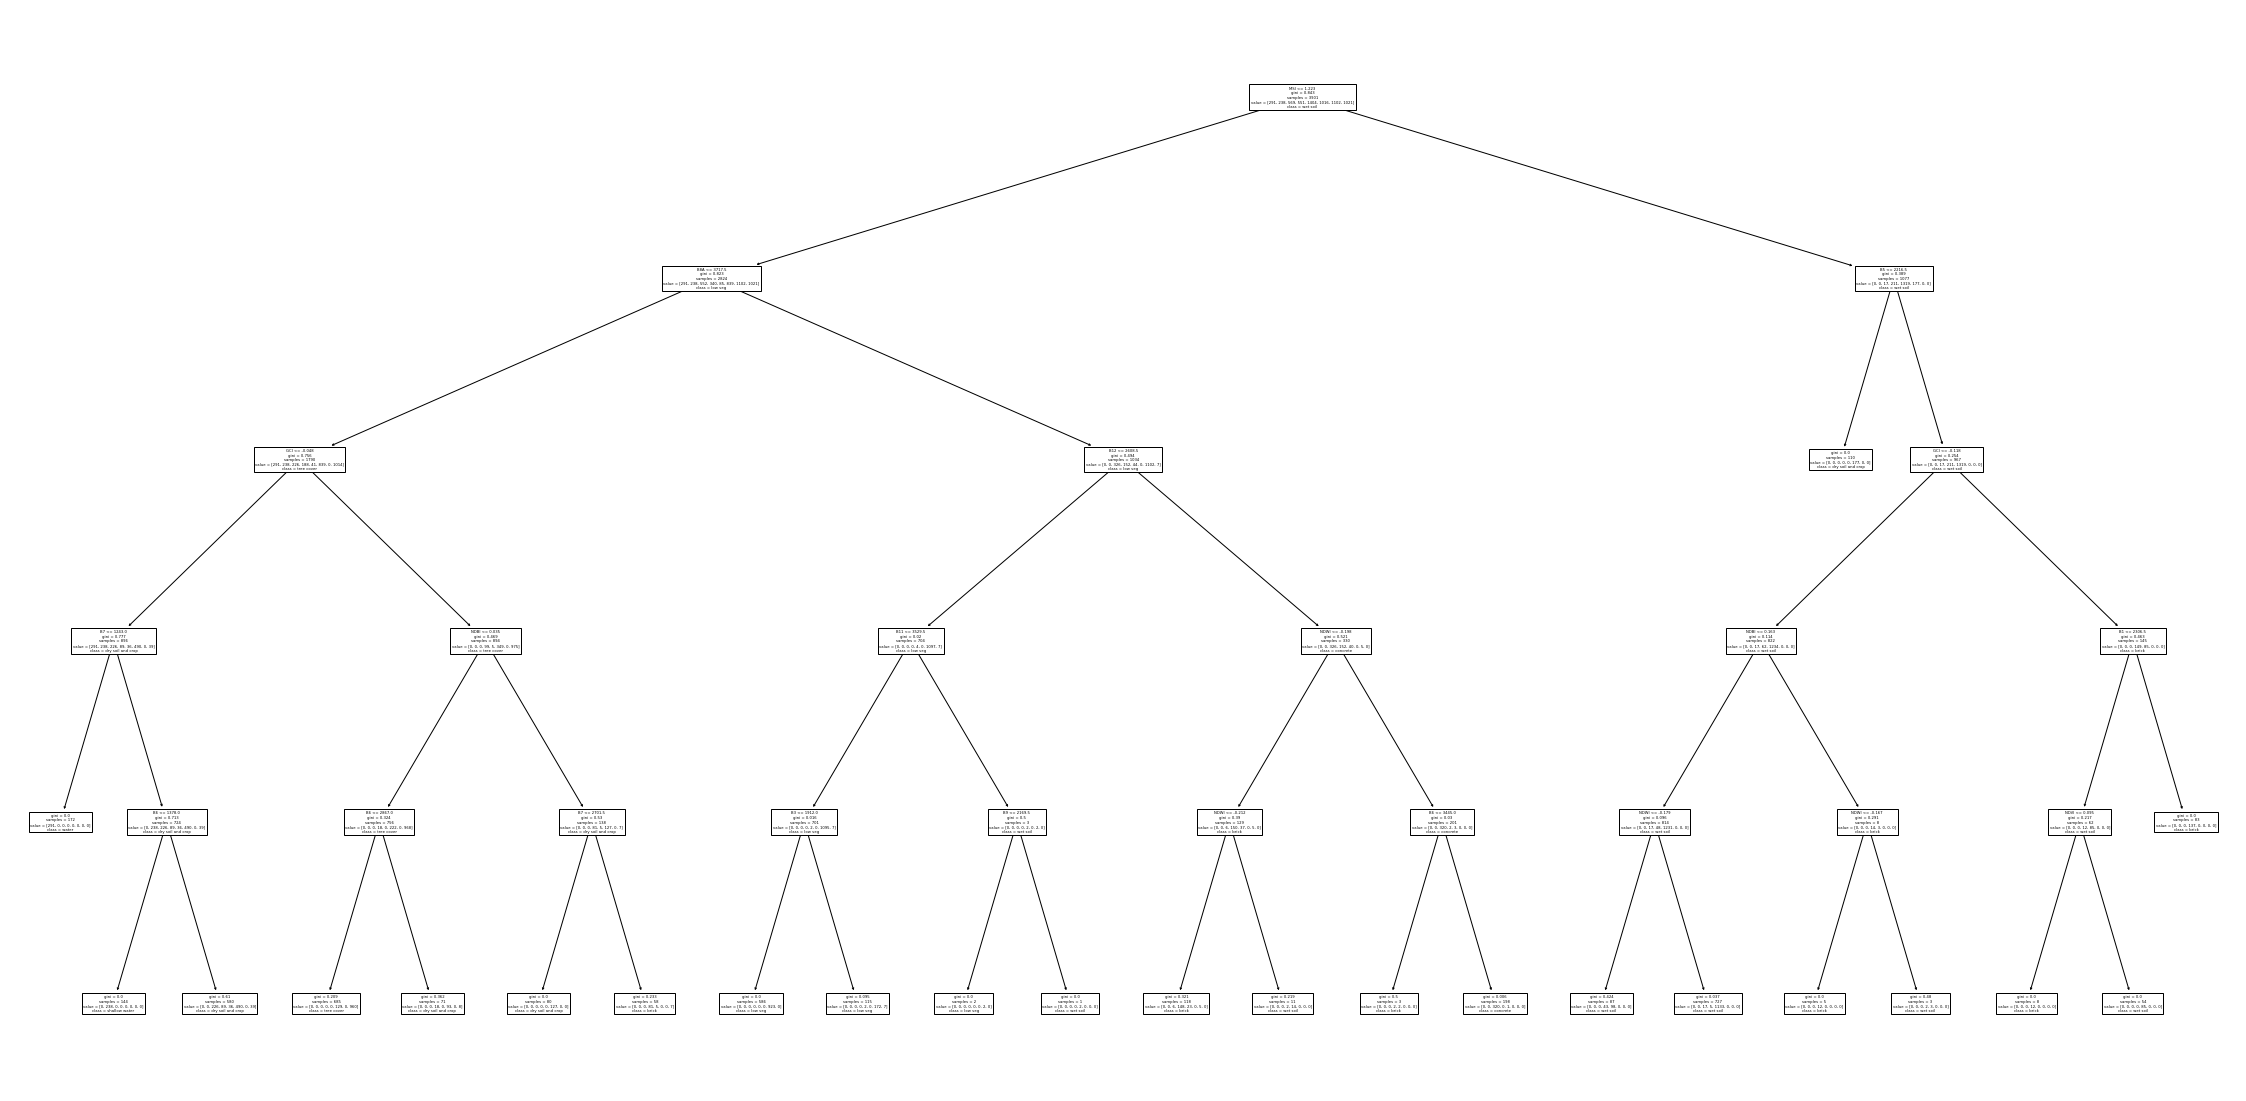

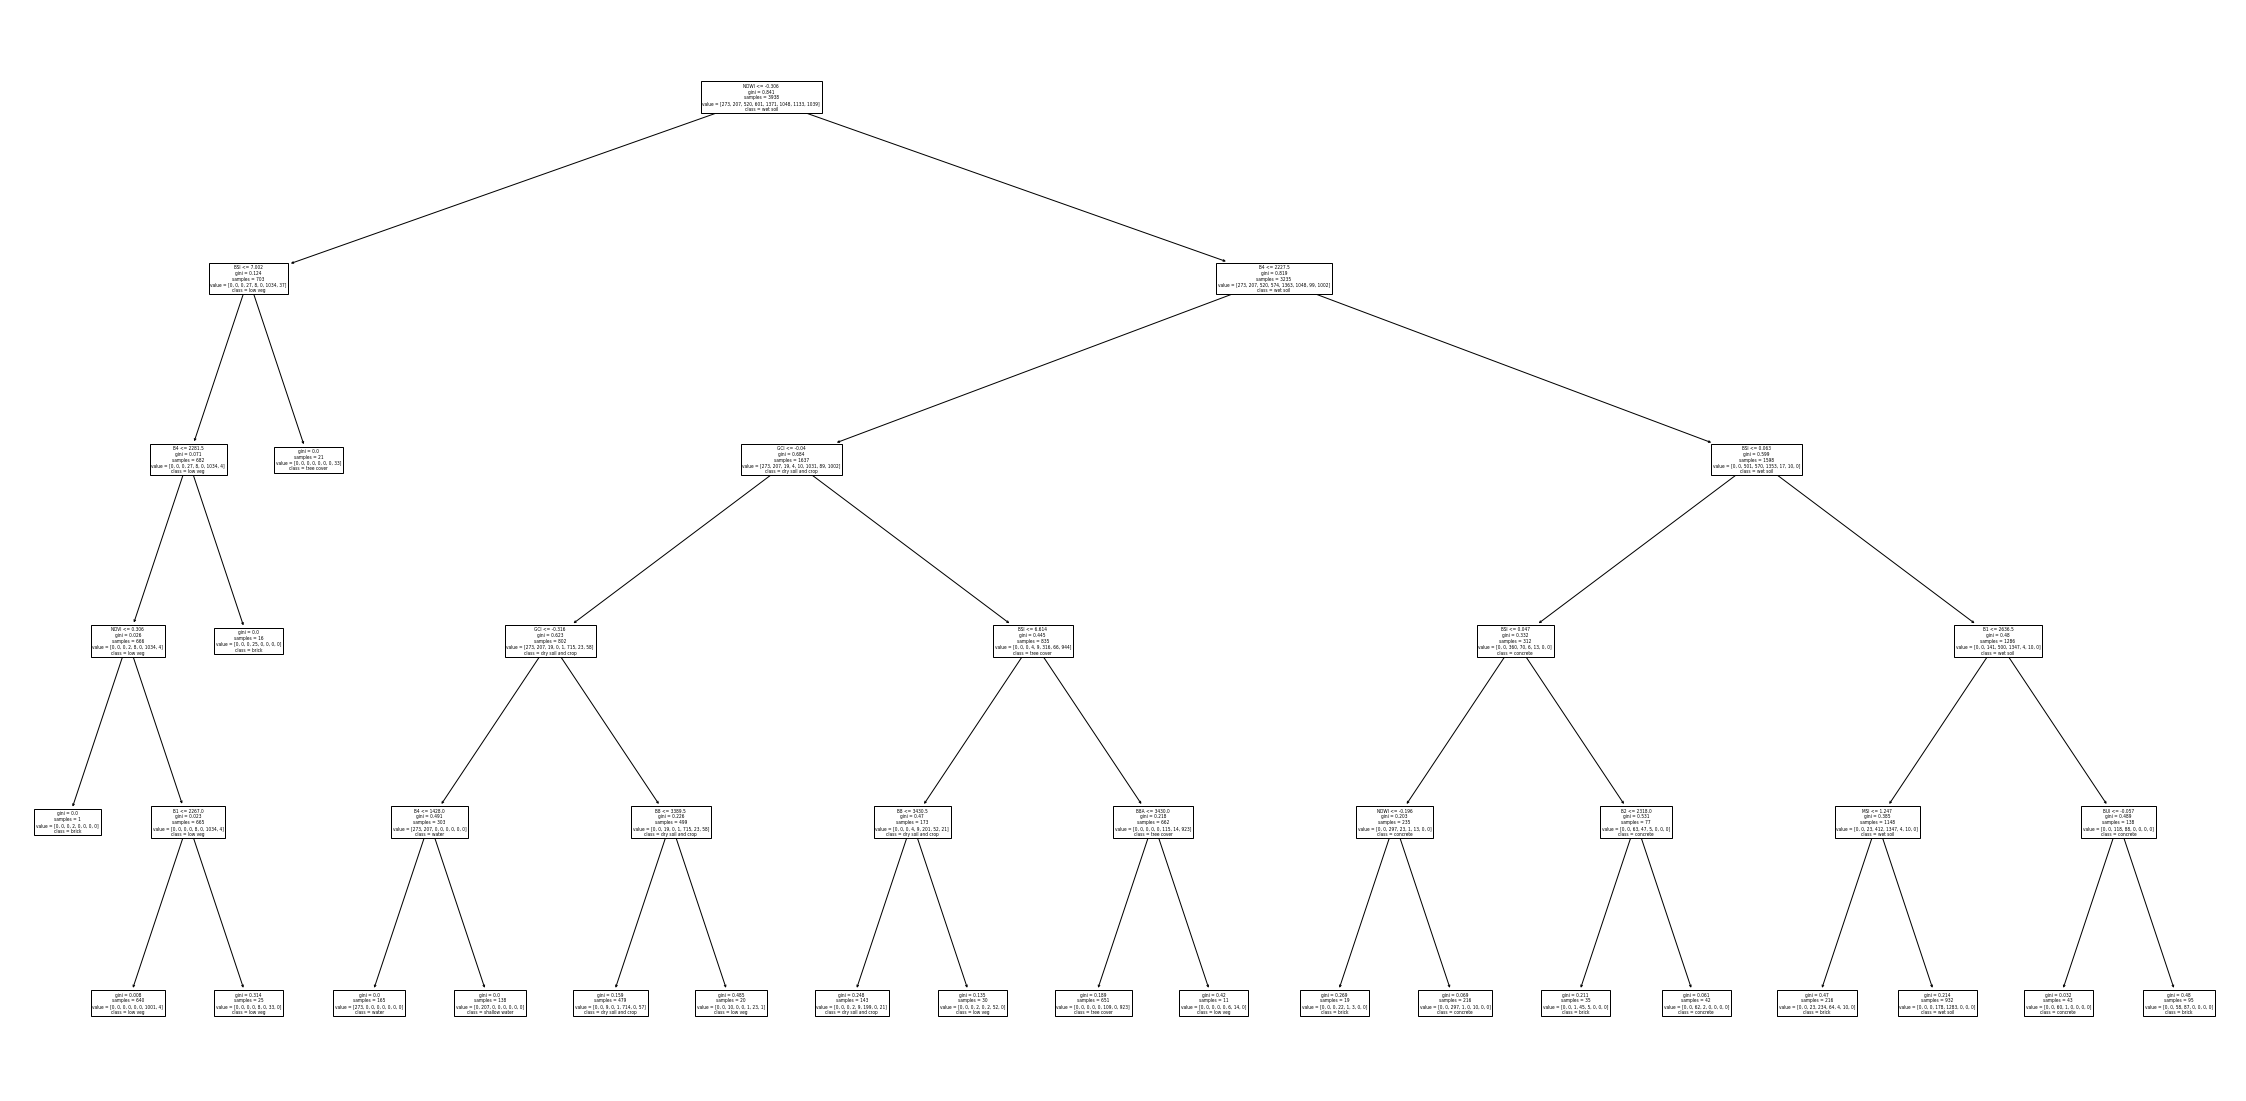

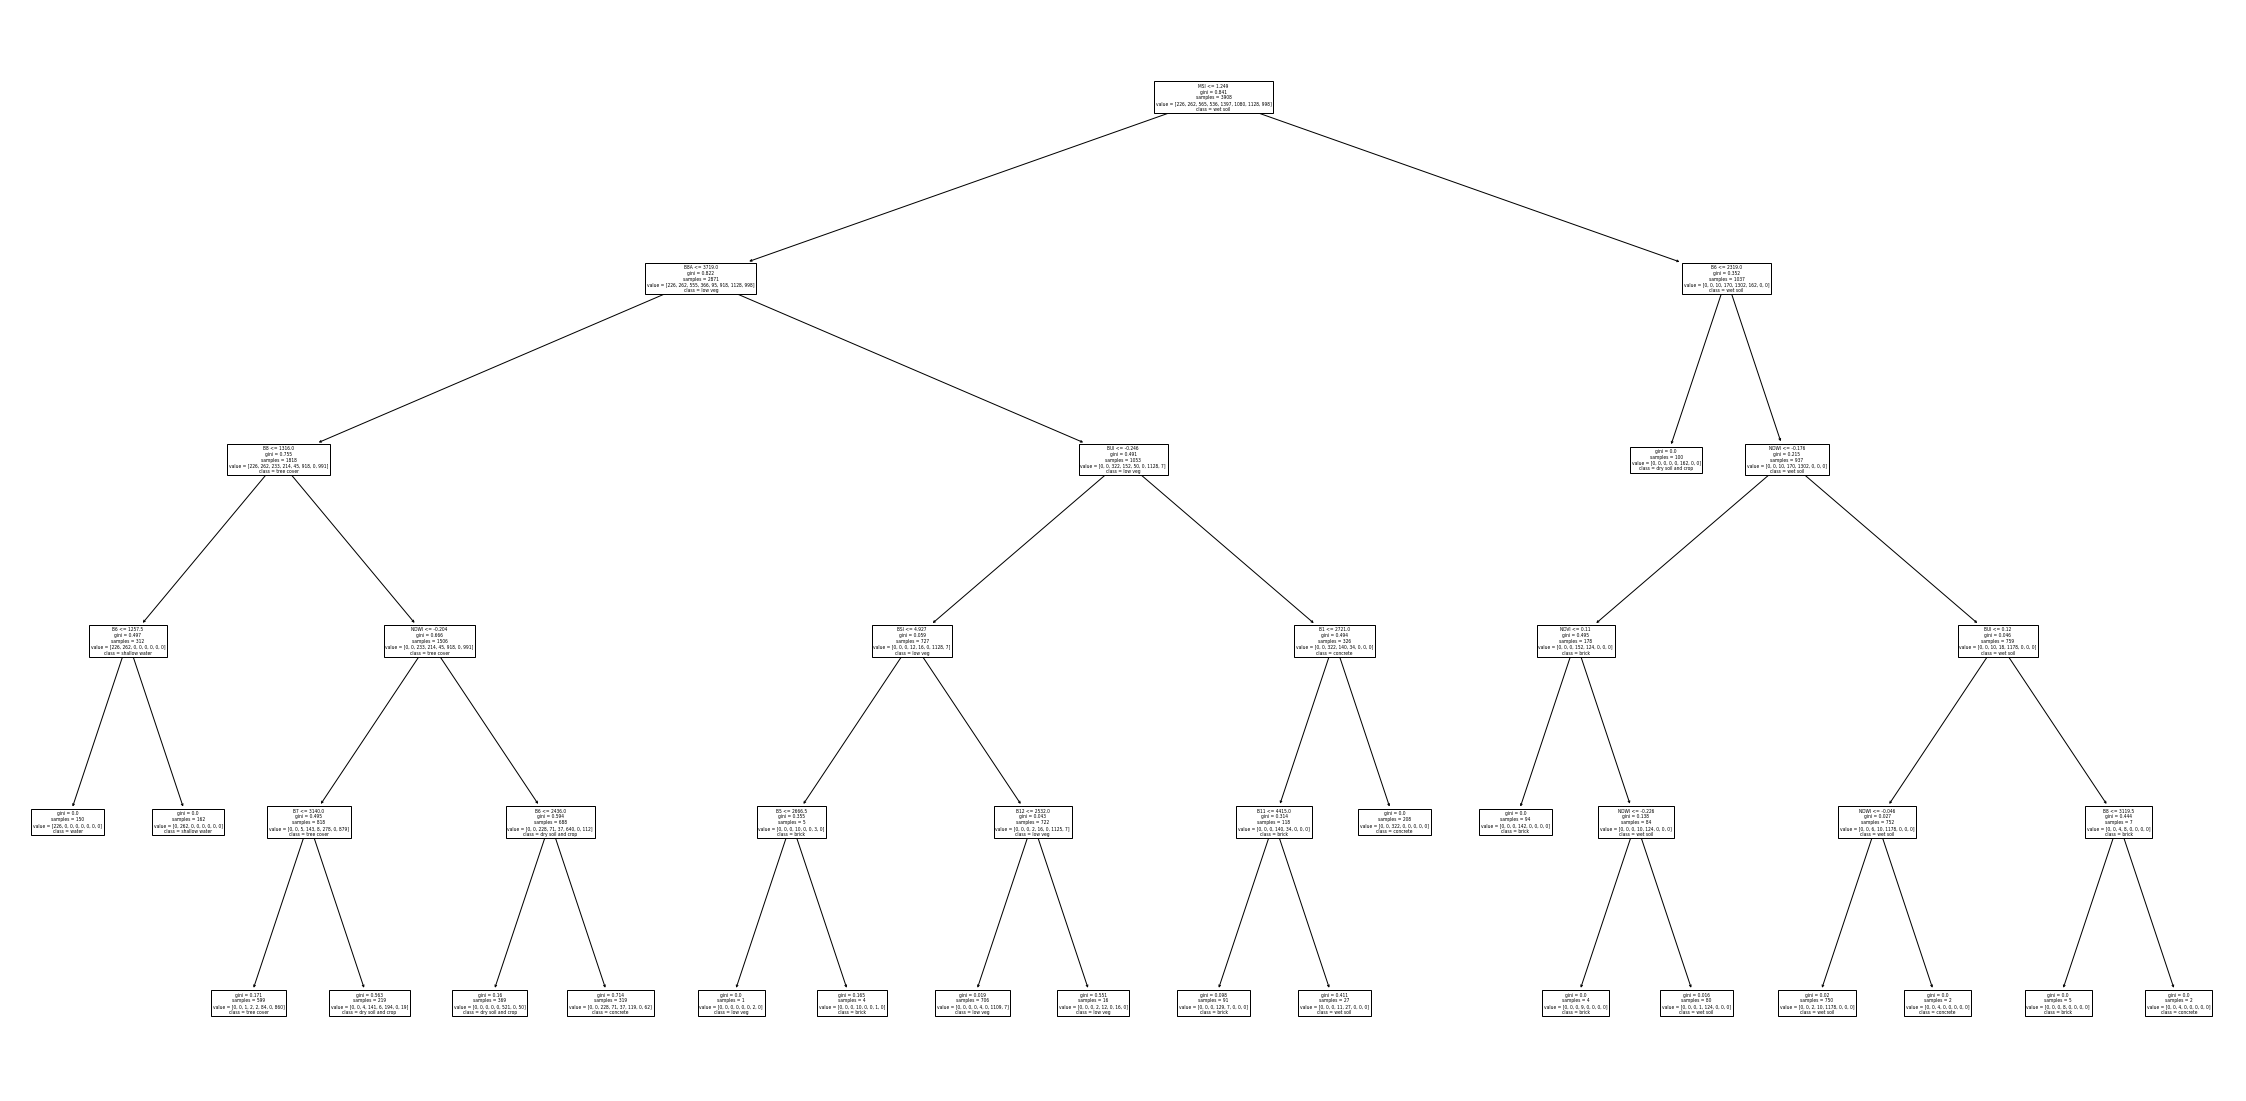

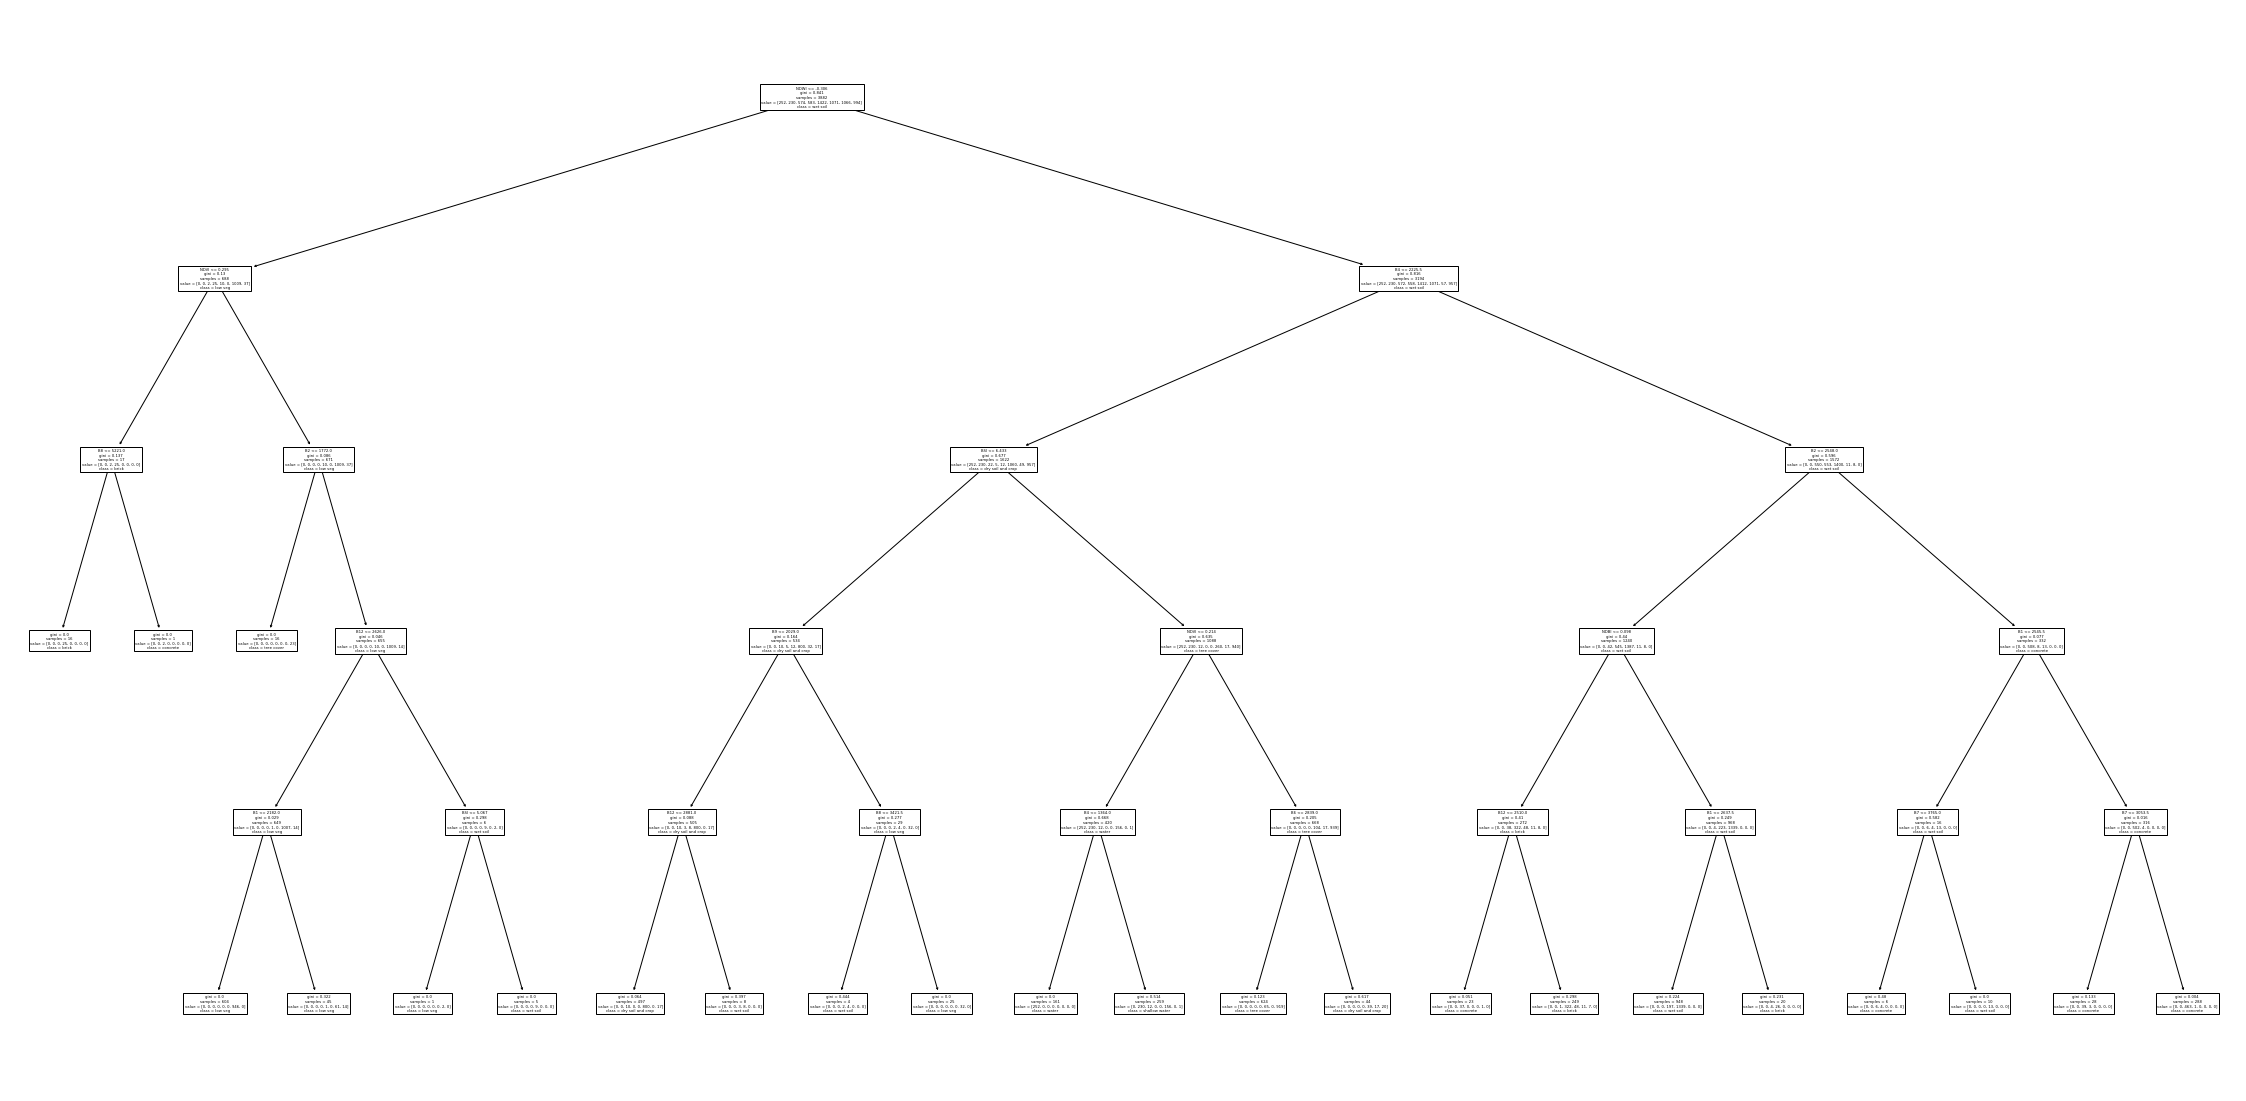

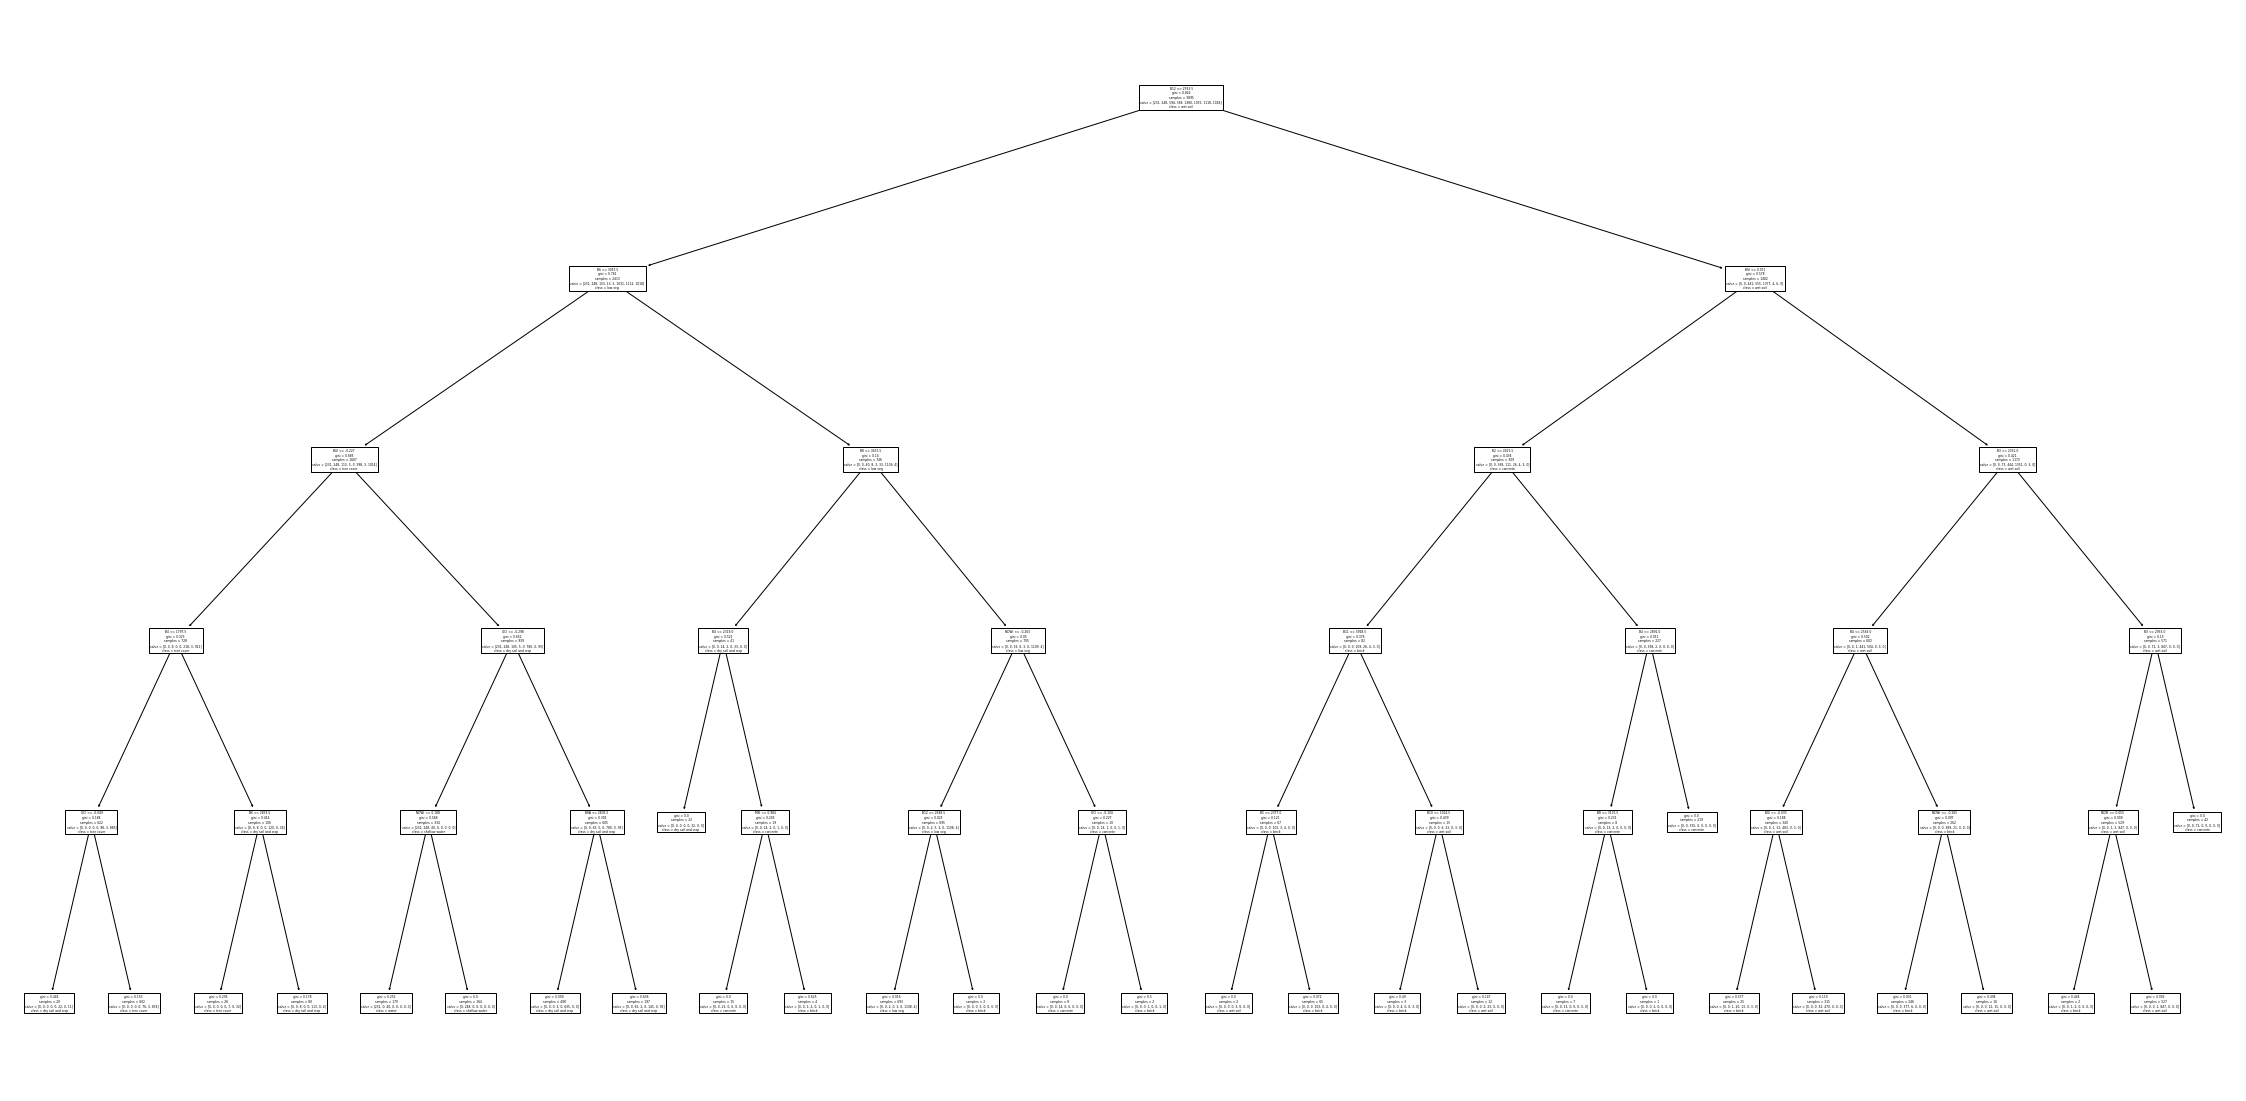

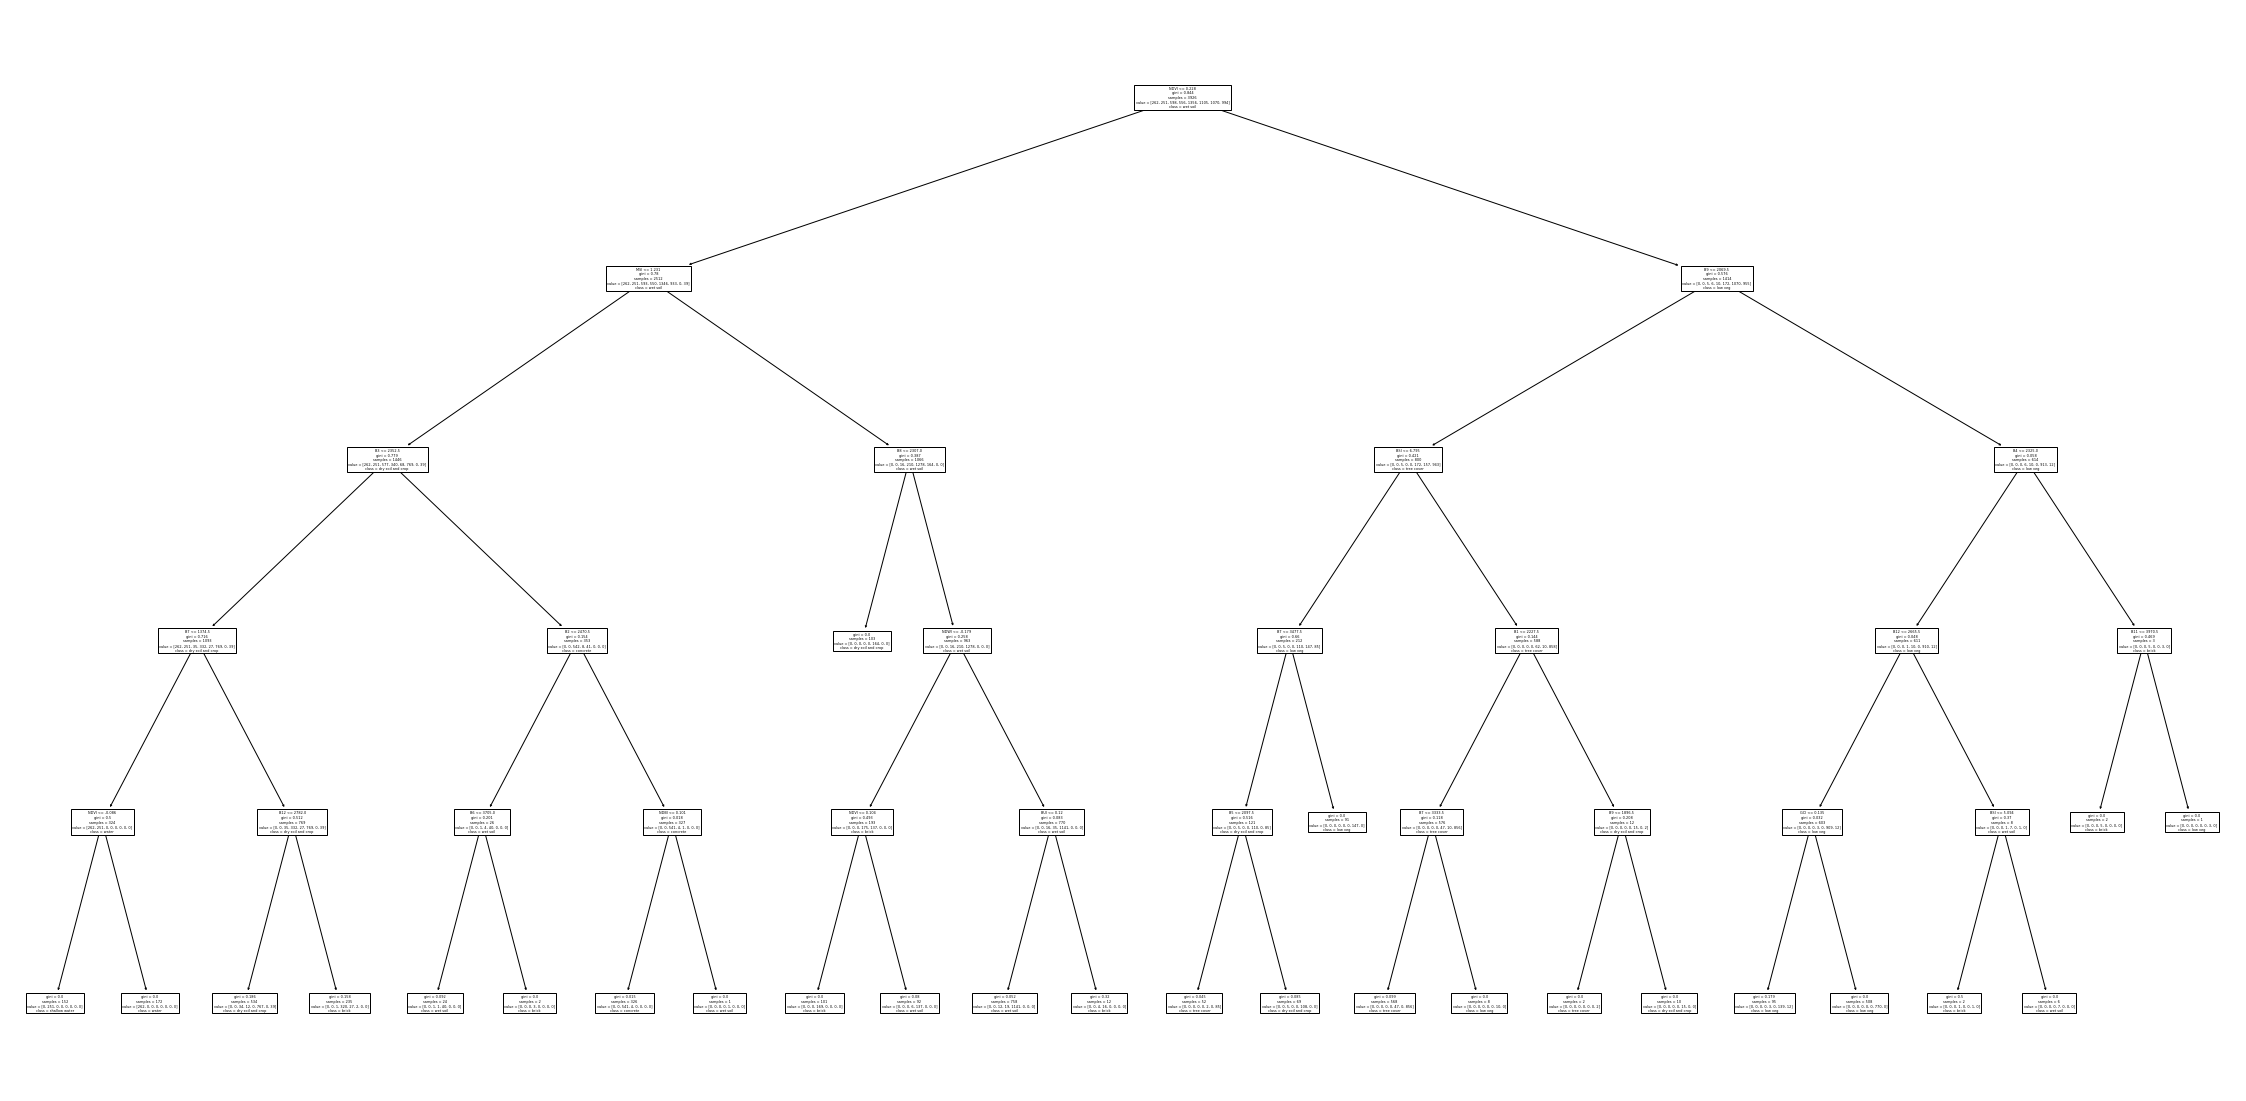

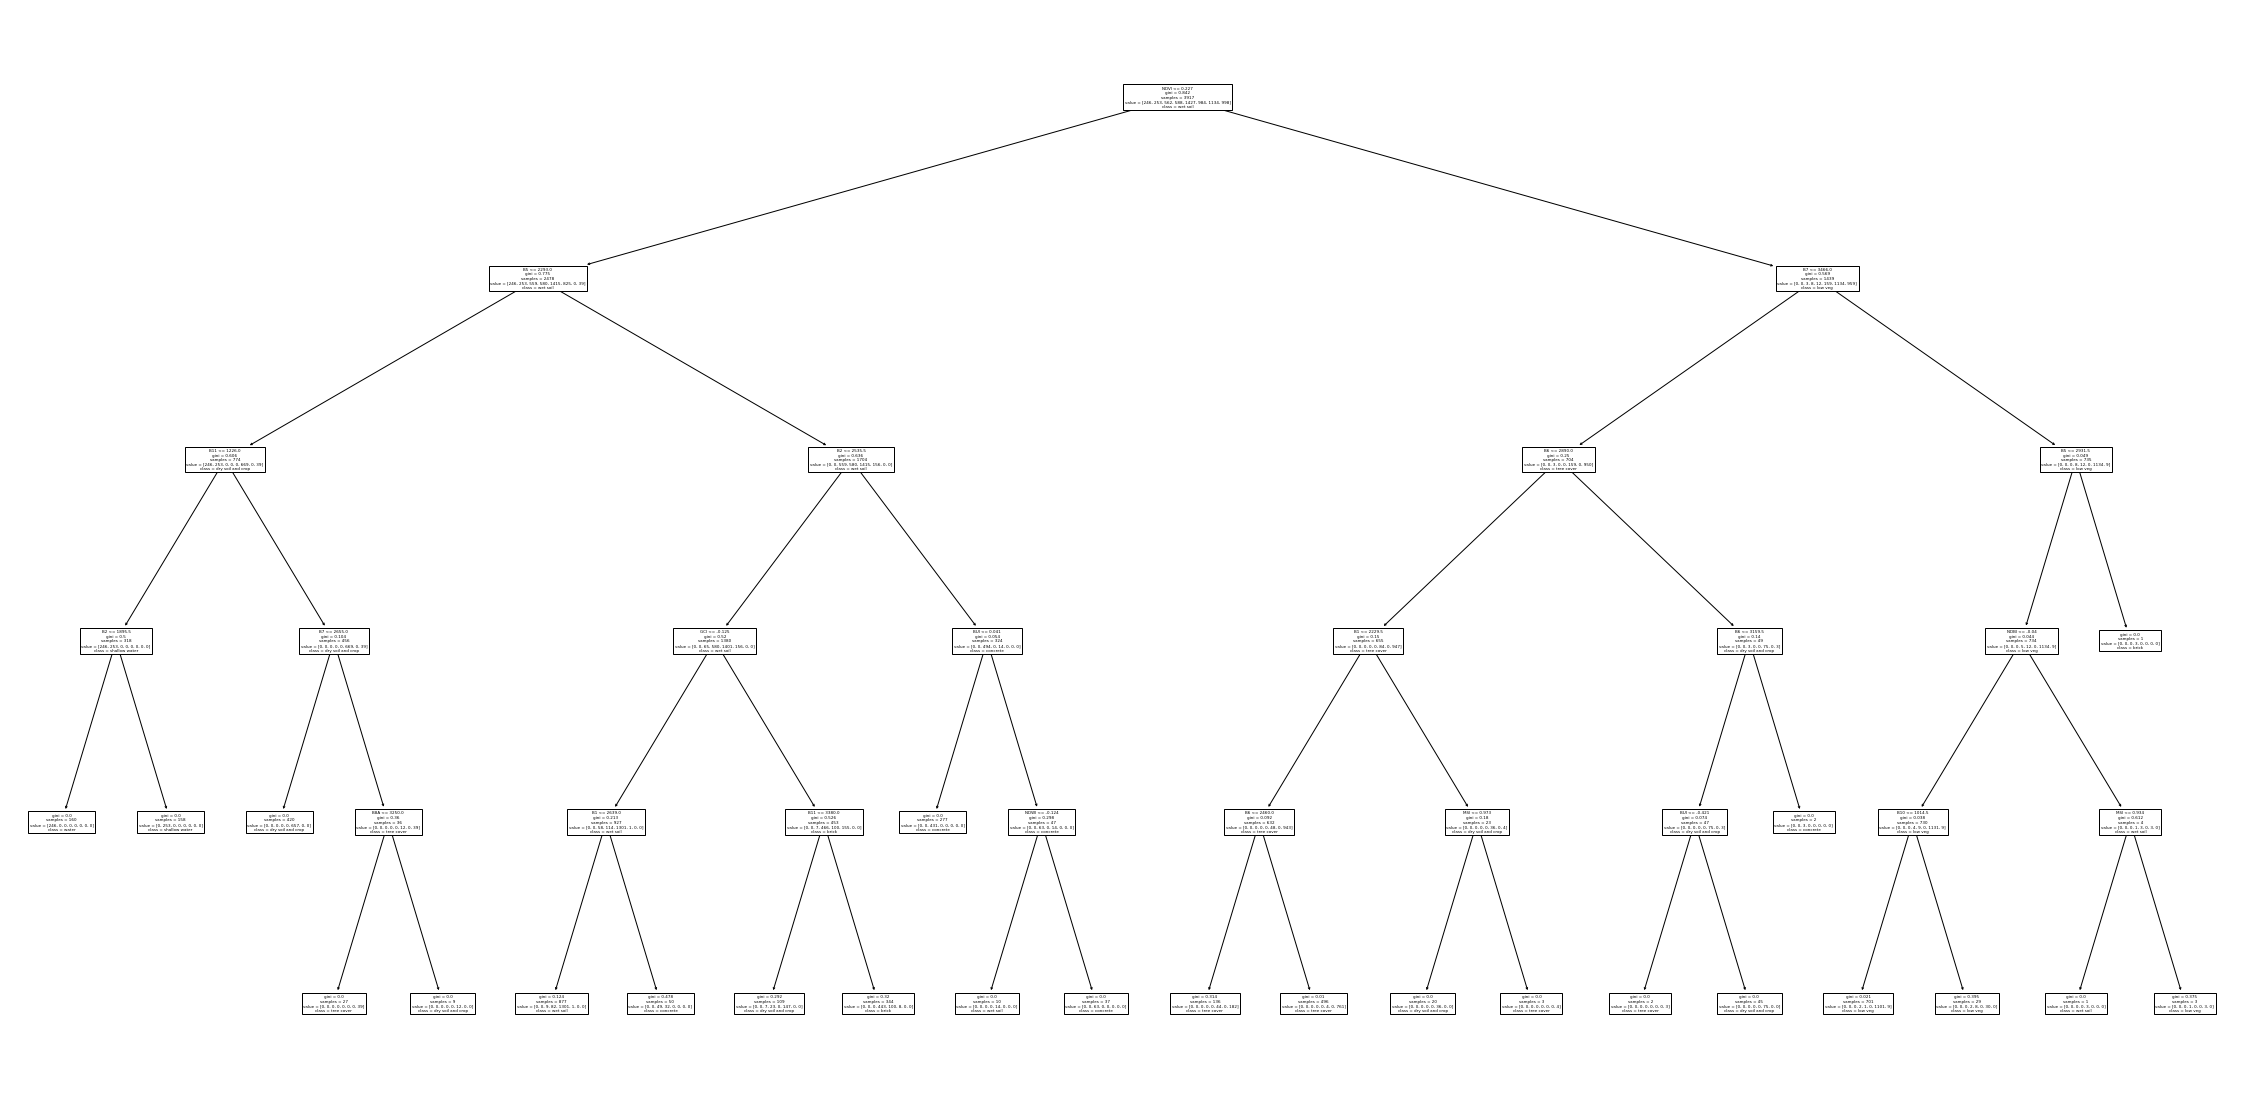

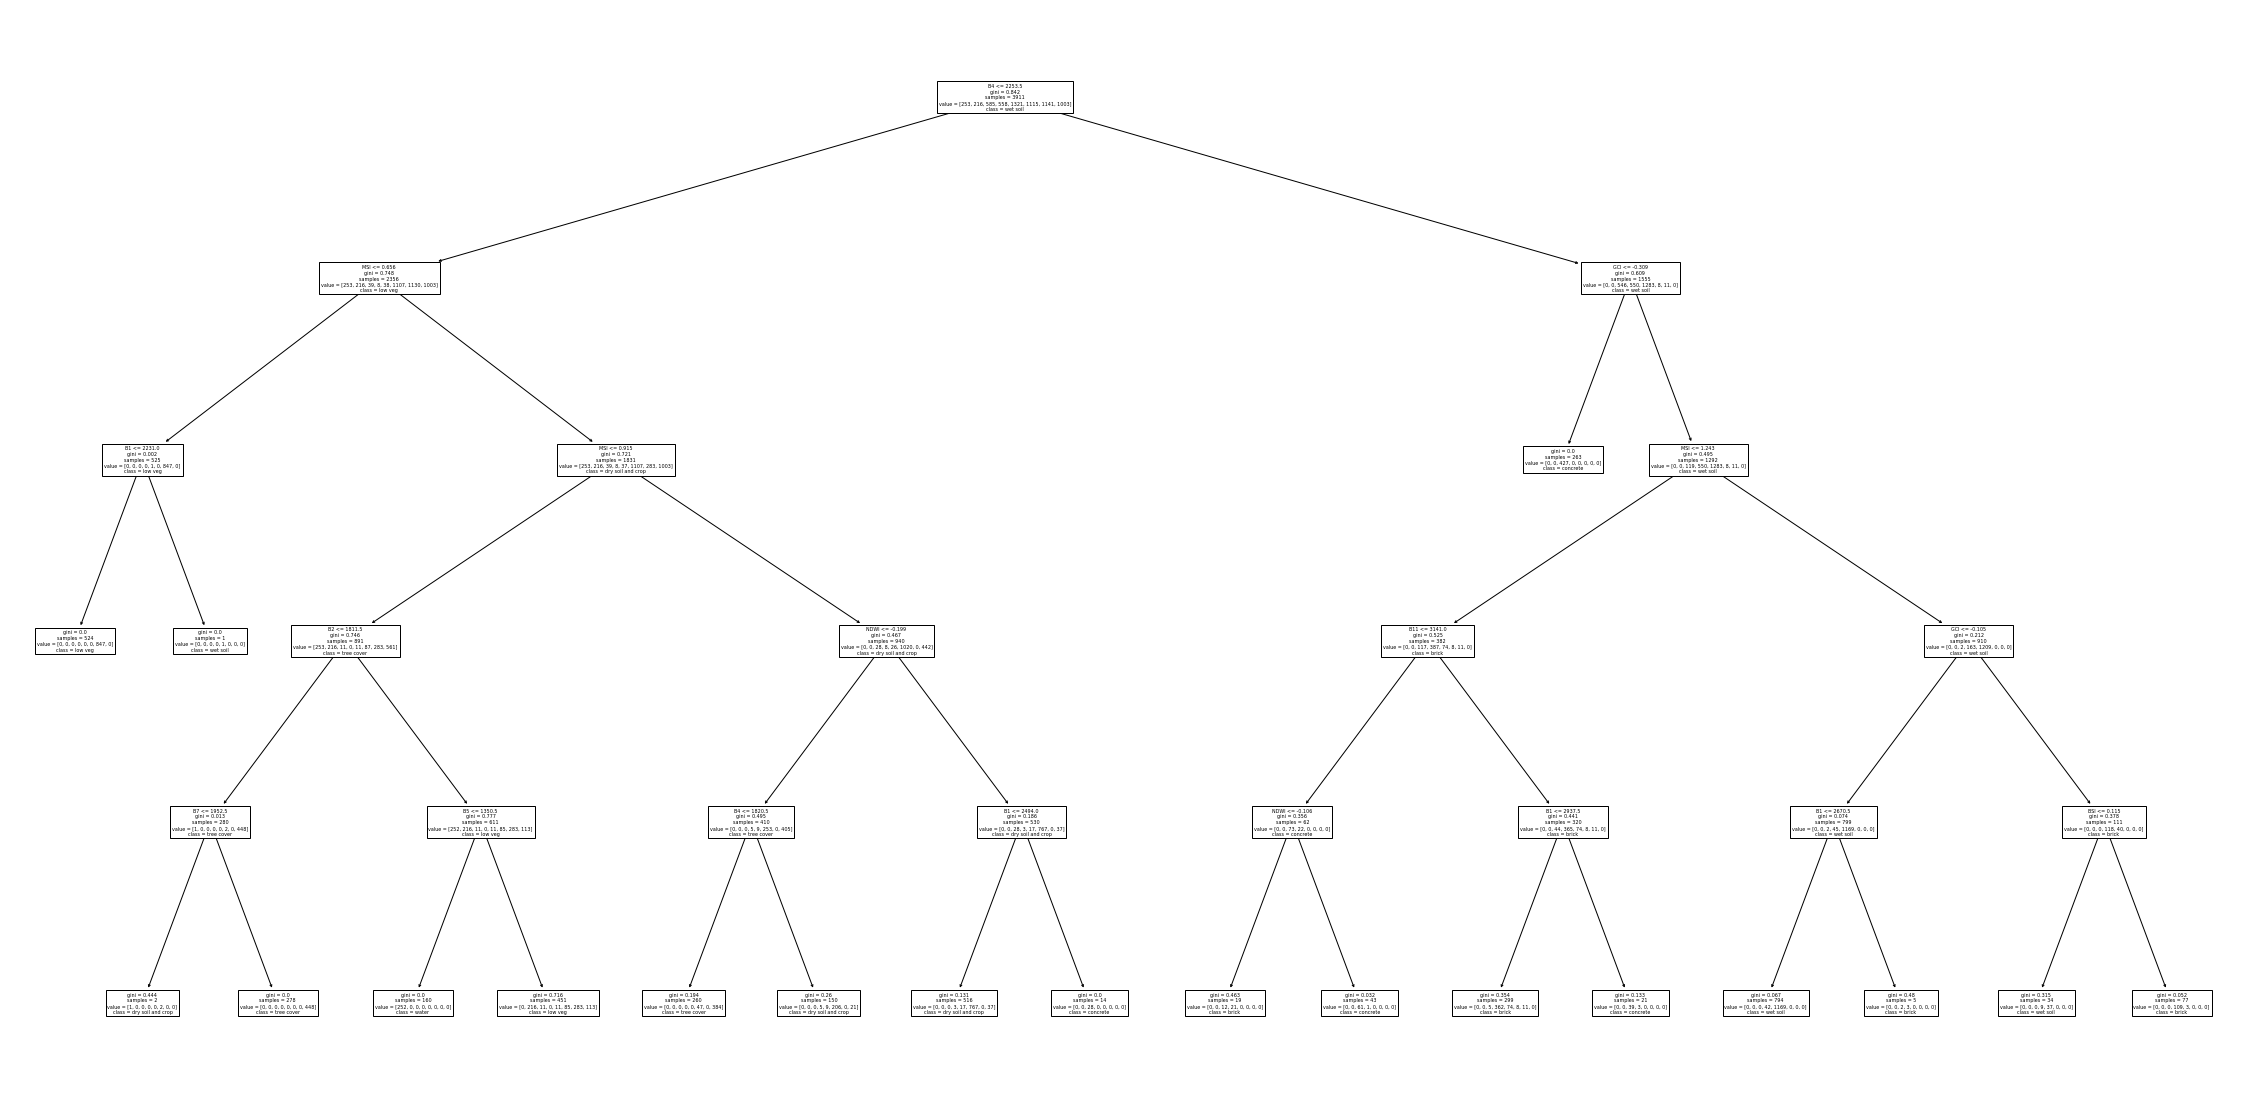

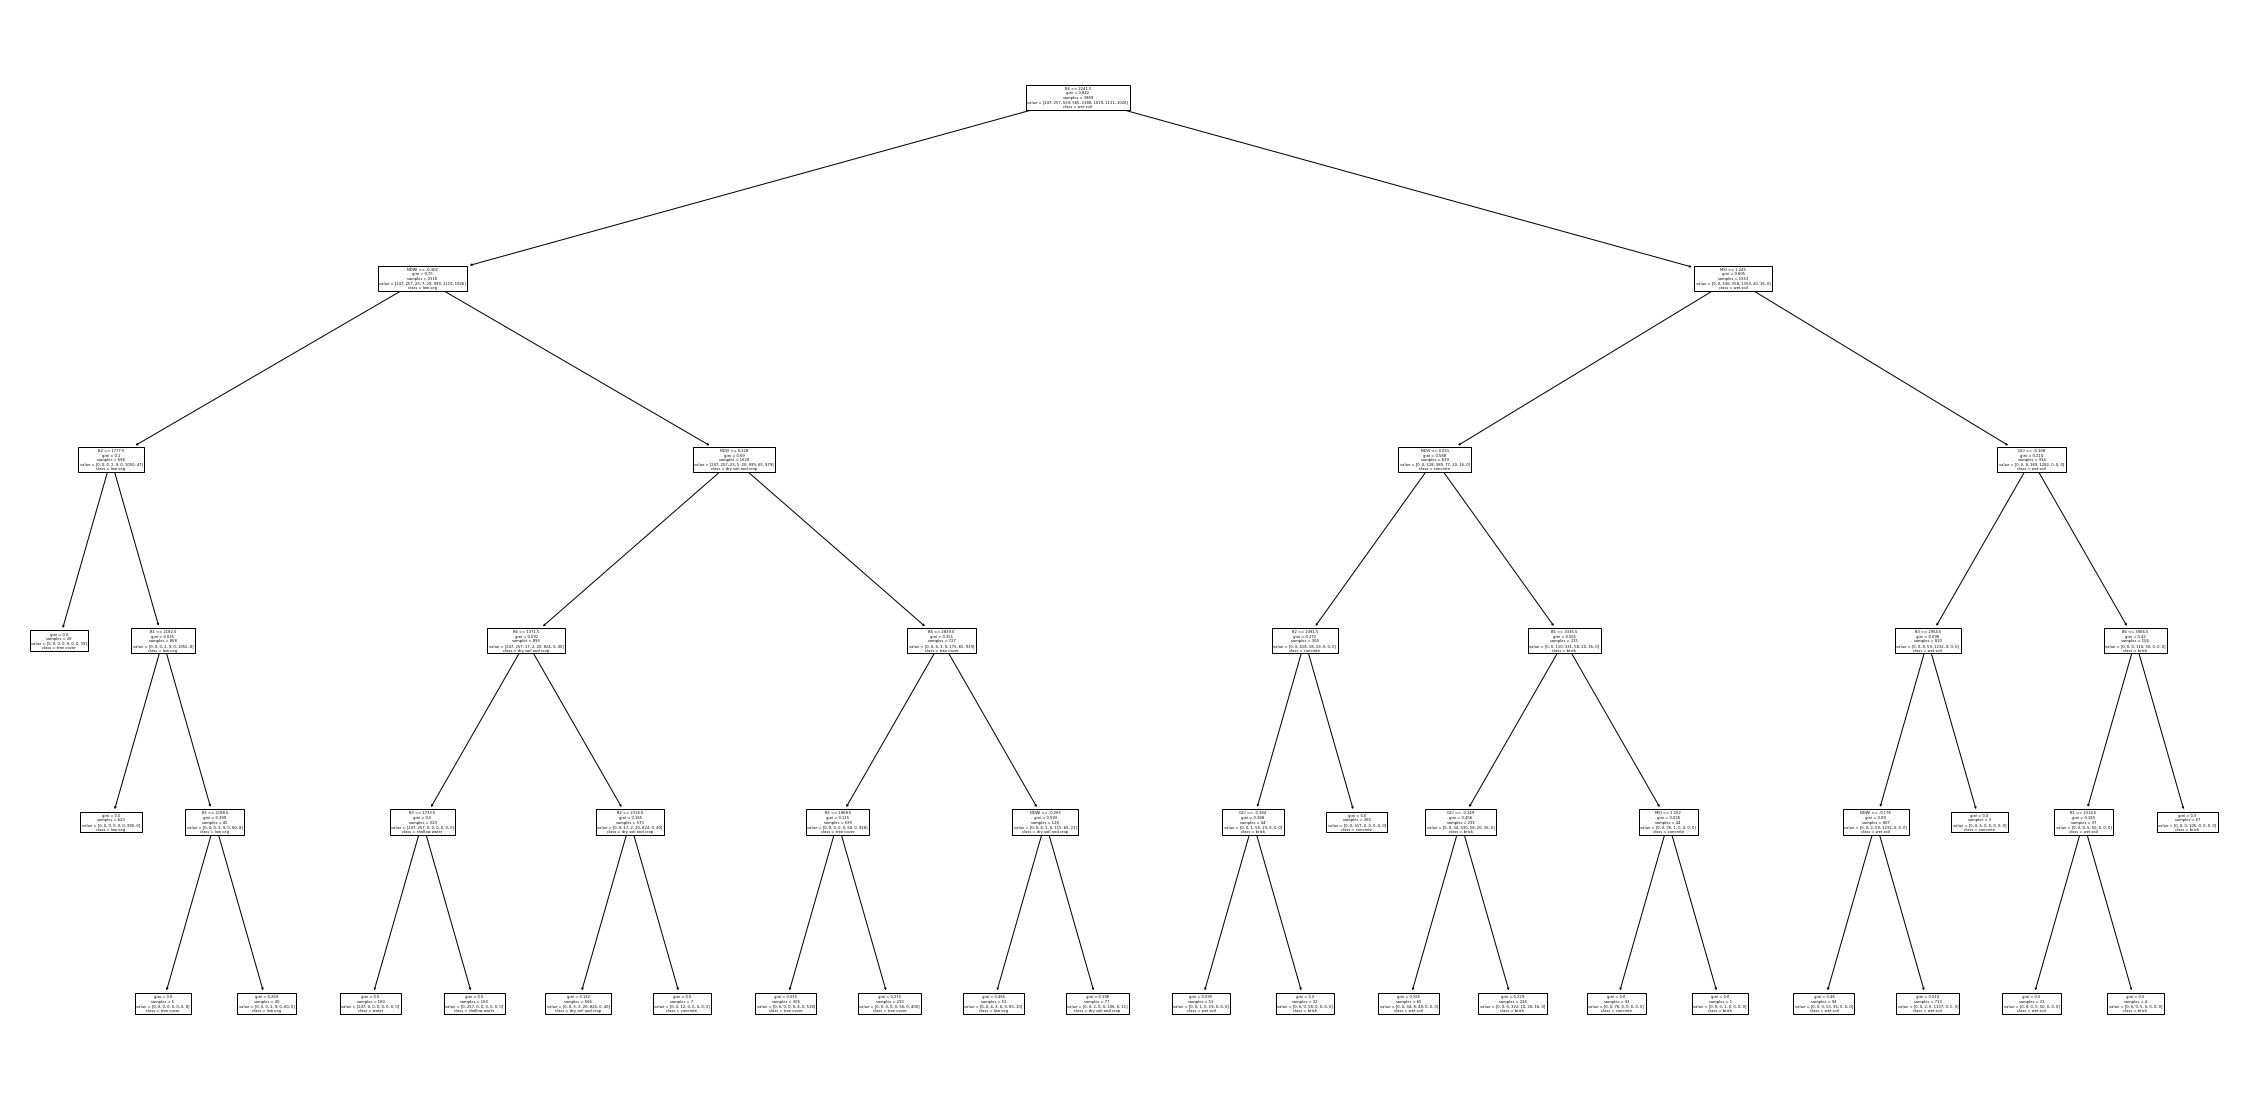

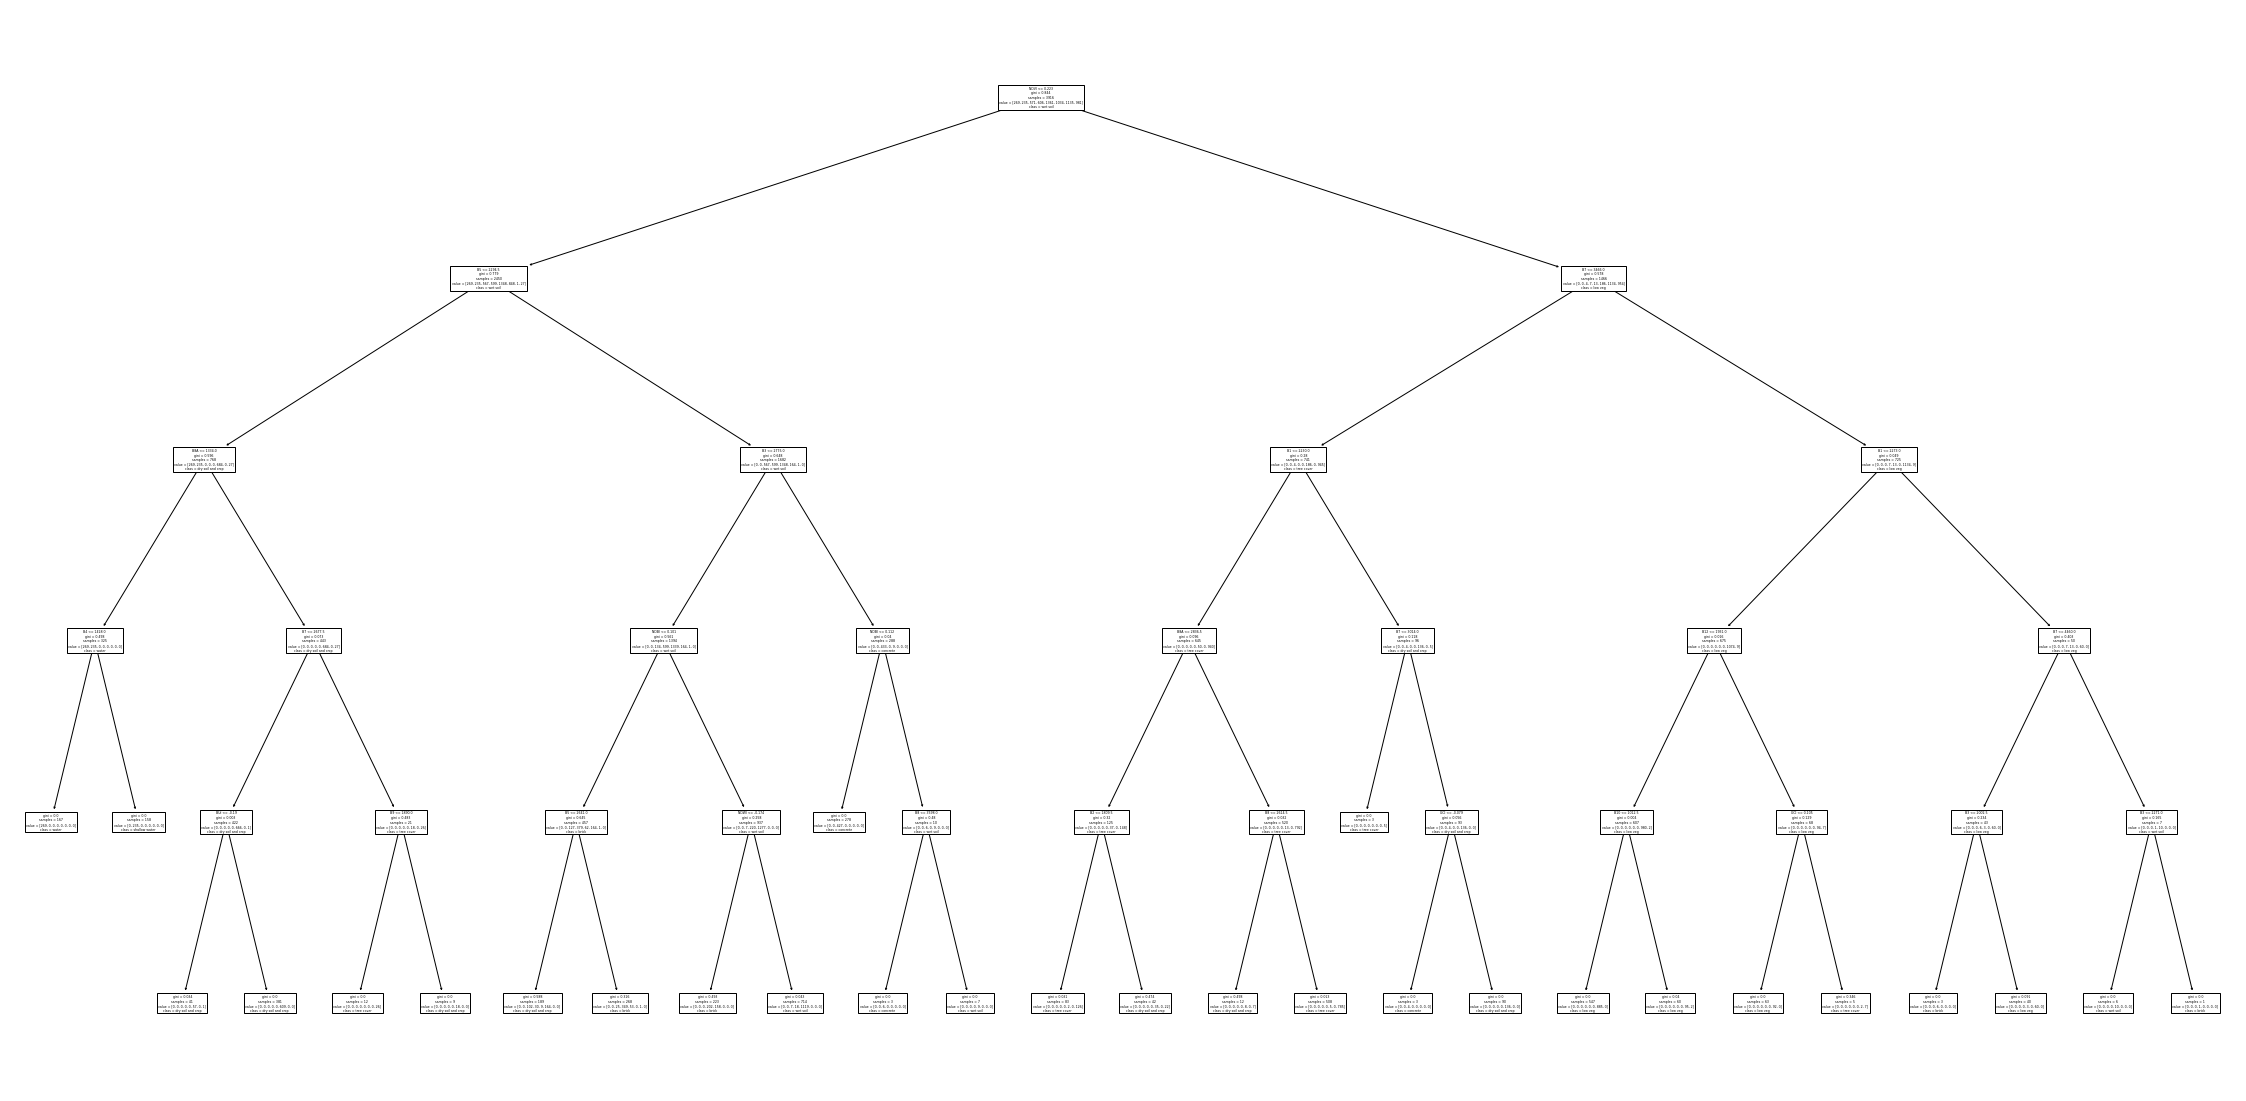

In [13]:
N=10

for i in range(N):
    fig = plt.figure(figsize=(40,20))
    plot_tree(rf_clf.estimators_[i],
              feature_names = band_names, 
              class_names = LC_class_names ) 
    plt.show()

In [11]:
bands=[]
for i in range(len(coll)):
    band = np.asarray(coll[i].data).flatten()
    bands.append(band)

X_all=np.stack(bands).T
X_all.shape

(10600401, 20)

In [12]:
%%time
Y_pred_rf = rf_clf.predict(X_all)


Wall time: 2min 3s


In [13]:
Y_im_rf = Y_pred_rf.reshape(coll[1].shape)
Y_im_rf.shape



(2737, 3873)

In [14]:

Y_im_rf

array([[6., 6., 6., ..., 6., 6., 6.],
       [6., 8., 8., ..., 8., 8., 6.],
       [6., 8., 7., ..., 7., 7., 6.],
       ...,
       [6., 6., 5., ..., 7., 7., 4.],
       [6., 6., 5., ..., 7., 7., 4.],
       [6., 6., 5., ..., 7., 7., 4.]])

Visualizing the results

In [15]:
ccm= ListedColormap(["midnightblue","teal","dimgrey","black","khaki","saddlebrown","lime","darkgreen"]) # custom colormap
water=mpatches.Patch(color='midnightblue',label='water')
shallowwater=mpatches.Patch(color='teal',label='shallow water')
concrete=mpatches.Patch(color='dimgrey',label='urban')
brick=mpatches.Patch(color='black',label='brick')
drs=mpatches.Patch(color='khaki',label='dry soil and vegetation')
ws=mpatches.Patch(color='saddlebrown',label='wet soil')
lv=mpatches.Patch(color='lime',label='low vegetation')
tr=mpatches.Patch(color='darkgreen',label='trees')


In [17]:
from PIL import Image
import rasterio as rio
bandname='T34TFL_20220408T092029_'
im=Image.fromarray(Y_im_rf)
im.save('ts.tif')
b4=rio.open(resampled+bandname+'B04.tif')
i=rio.open('ts.tif')
B4=b4.read()
Im=i.read()
meta = b4.meta 
meta.update(driver='GTiff')
meta.update(dtype=rio.float32)
with rio.open(os.path.join(data_path_full, 'Full Classification.tif'), 'w', **meta) as dst:
    dst.write(Im.astype(rio.float32))

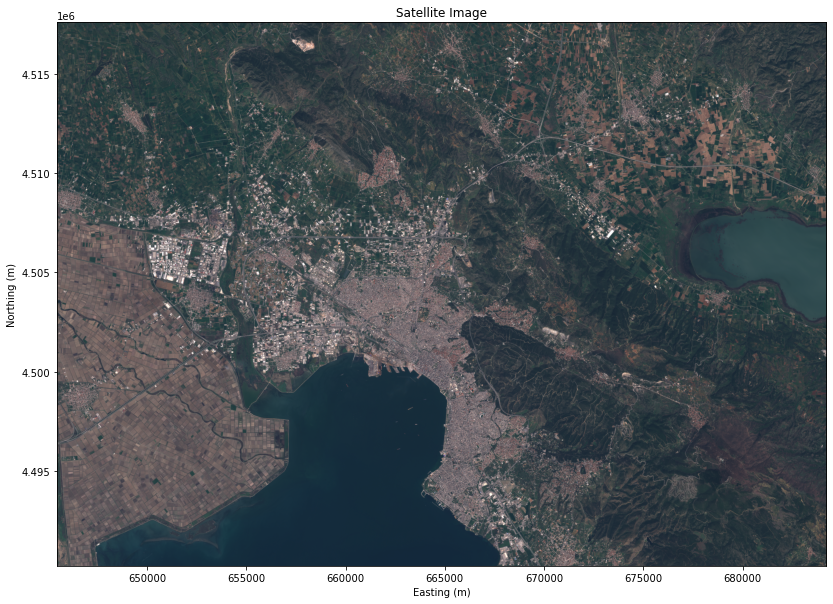

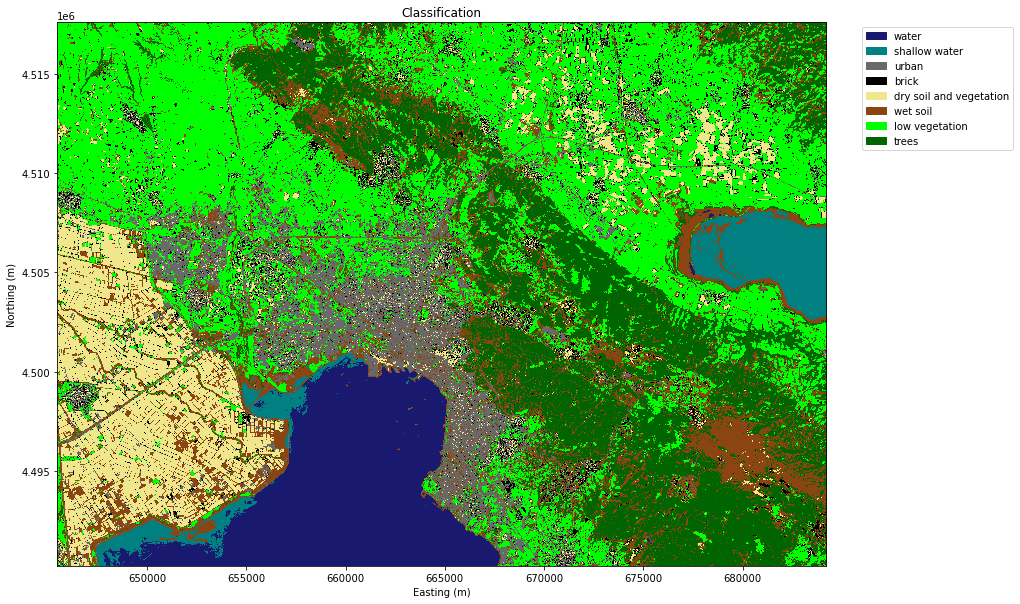

<AxesSubplot:title={'center':'Classification'}, xlabel='Easting (m)', ylabel='Northing (m)'>

In [18]:
img=rio.open(os.path.join(data_path_full, 'T34TFL_20220408T092029_TCI.tif'))
cls=rio.open(os.path.join(data_path_full, 'Full Classification.tif'))
plt.figure(1,figsize=(20,10))
plt.title('Satellite Image')
plt.ylabel('Northing (m)')
plt.xlabel('Easting (m)')
show(img)
plt.figure(2,figsize=(20,10))
plt.legend(handles=[water,shallowwater,concrete,brick,drs,ws,lv,tr],bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Classification')
plt.ylabel('Northing (m)')
plt.xlabel('Easting (m)')
show(cls,cmap=ccm,interpolation='none')


Creating A Confusion Matrix

In [19]:
p_val = np.loadtxt(trainpath+'validation3.txt',dtype='int')
p_val.shape


(207, 3)

In [20]:
pred_rf = Y_im_rf[p_val[:,1],p_val[:,0]]

In [21]:
ovAcc_rf = accuracy_score(p_val[:,2],pred_rf)
print("Overall accuracy for Random Forest: " + str(100*ovAcc_rf) + "%")

Overall accuracy for Random Forest: 89.85507246376811%


In [22]:
labels=['water','shallow water','urban','brick','dry soil & veg','wet soil','low veg','trees']
confM_rf = confusion_matrix(p_val[:,2],pred_rf)

In [23]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

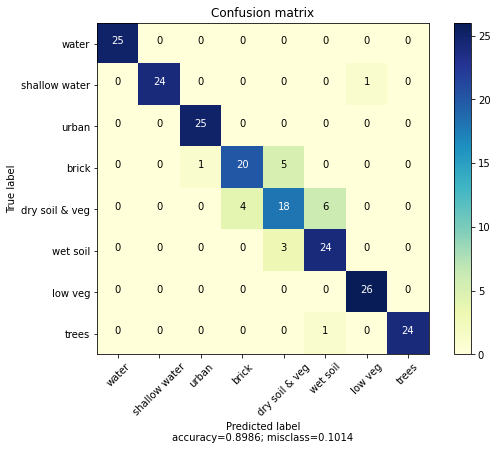

In [24]:
plot_confusion_matrix(confM_rf,labels,title='Confusion matrix',cmap='YlGnBu', normalize=False)

Running the model without the bricks class 

In [25]:
# stacking data for all classes in one table
X2=np.vstack((X_water,X_shallow_water,X_concrete,X_dry_soil_crop,X_wet_soil,X_low_veg,X_trees))
# add X_brick after X_concrete for all the learning stacks
print(X2.shape)
y2=np.vstack((np.ones((X_water.shape[0], 1)),
             2*np.ones((X_shallow_water.shape[0], 1)),
             3*np.ones((X_concrete.shape[0], 1)),
             #4*np.ones((X_brick.shape[0], 1)),
             5*np.ones((X_dry_soil_crop.shape[0], 1)),
             6*np.ones((X_wet_soil.shape[0], 1)),
             7*np.ones((X_low_veg.shape[0], 1)),
             8*np.ones((X_trees.shape[0], 1))))

print(y2.shape)

(5620, 20)
(5620, 1)


In [26]:
rf_clf = RandomForestClassifier(n_estimators=100,
                             max_depth=5,
                             random_state=0)    

rf_clf.fit(X2, np.ravel(y2))
 
bands=[]
for i in range(len(coll)):
    band = np.asarray(coll[i].data).flatten()
    bands.append(band)

X_all2=np.stack(bands).T
X_all2.shape

(10600401, 20)

In [27]:
%%time
Y_pred_rf2 = rf_clf.predict(X_all2)

Wall time: 2min 18s


In [28]:
Y_im_rf2 = Y_pred_rf2.reshape(coll[1].shape)
Y_im_rf2.shape

(2737, 3873)

In [29]:
Y_im_rf2

array([[6., 6., 6., ..., 6., 6., 6.],
       [6., 8., 8., ..., 8., 8., 6.],
       [6., 8., 7., ..., 7., 7., 6.],
       ...,
       [6., 6., 5., ..., 7., 7., 5.],
       [6., 6., 5., ..., 7., 7., 5.],
       [6., 6., 5., ..., 7., 7., 5.]])

In [51]:
ccm2= ListedColormap(["midnightblue","teal","silver","dimgrey","khaki","saddlebrown","lime","darkgreen"]) # custom colormap
water=mpatches.Patch(color='midnightblue',label='water')
shallowwater=mpatches.Patch(color='teal',label='shallow water')
concrete=mpatches.Patch(color='dimgrey',label='urban')
drs=mpatches.Patch(color='khaki',label='dry soil and vegetation')
ws=mpatches.Patch(color='saddlebrown',label='wet soil')
lv=mpatches.Patch(color='lime',label='low vegetation')
tr=mpatches.Patch(color='darkgreen',label='trees')

In [71]:
from PIL import Image
import rasterio as rio
bandname='T34TFL_20220408T092029_'
im2=Image.fromarray(Y_im_rf2)
im2.save('ts2.tif')
b4=rio.open(resampled+bandname+'B04.tif')
i2=rio.open('ts2.tif')
B4=b4.read()
Im2=i2.read()
meta = b4.meta 
meta.update(driver='GTiff')
meta.update(dtype=rio.float32)
with rio.open(os.path.join(data_path_full, 'Full Classification without Bricks.tif'), 'w', **meta) as dst:
    dst.write(Im2.astype(rio.float32))

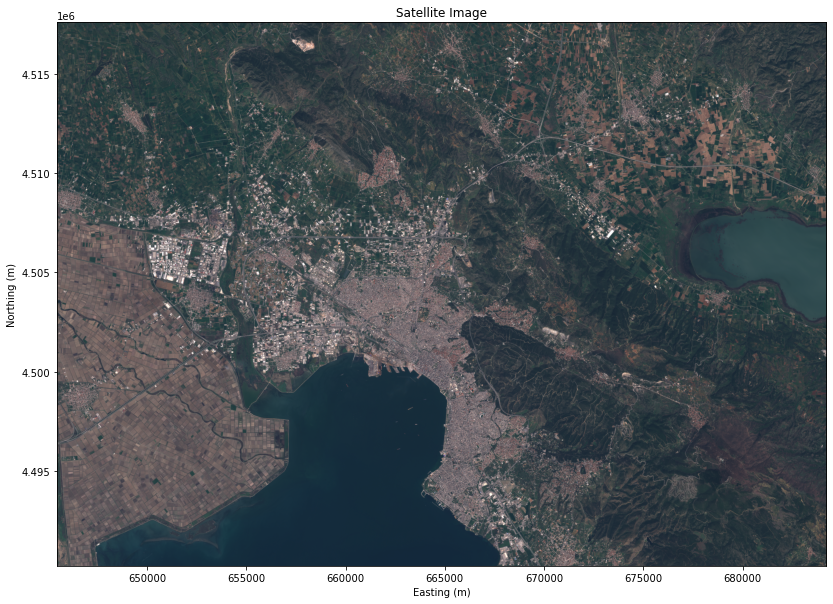

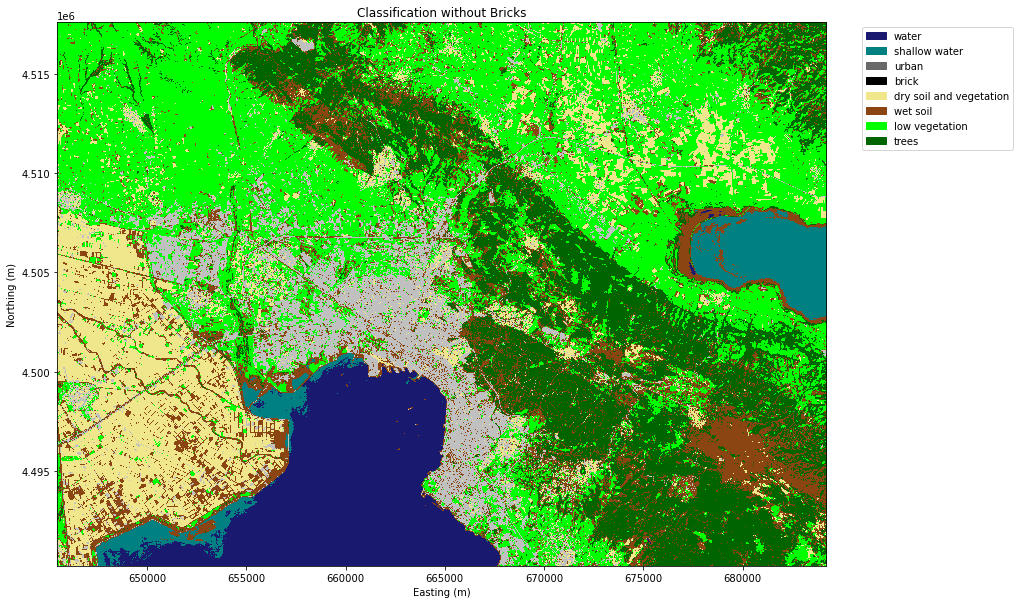

<AxesSubplot:title={'center':'Classification without Bricks'}, xlabel='Easting (m)', ylabel='Northing (m)'>

In [74]:
img=rio.open(os.path.join(data_path_full, 'T34TFL_20220408T092029_TCI.tif'))
cls=rio.open(os.path.join(data_path_full, 'Full Classification without Bricks.tif'))
plt.figure(1,figsize=(20,10))
plt.title('Satellite Image')
plt.ylabel('Northing (m)')
plt.xlabel('Easting (m)')
show(img)
plt.figure(2,figsize=(20,10))
plt.legend(handles=[water,shallowwater,concrete,brick,drs,ws,lv,tr],bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Classification without Bricks')
plt.ylabel('Northing (m)')
plt.xlabel('Easting (m)')
show(cls,cmap=ccm2,interpolation='none')


Overall accuracy for Random Forest: 95.58011049723757%


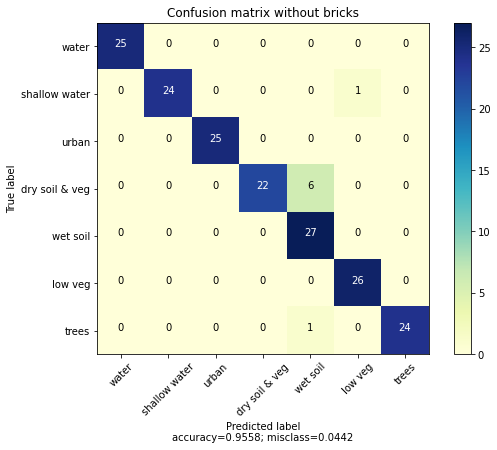

In [32]:
labels2=['water','shallow water','urban','dry soil & veg','wet soil','low veg','trees']
p_val2 = np.loadtxt(trainpath+'validation2.txt',dtype='int')
p_val2.shape
pred_rf2 = Y_im_rf2[p_val2[:,1],p_val2[:,0]]
ovAcc_rf2 = accuracy_score(p_val2[:,2],pred_rf2)
print("Overall accuracy for Random Forest: " + str(100*ovAcc_rf2) + "%")
confM_rf2 = confusion_matrix(p_val2[:,2],pred_rf2)
plot_confusion_matrix(confM_rf2,labels2,title='Confusion matrix without bricks',cmap='YlGnBu', normalize=False)

Overall accuracy for Random Forest: 83.57487922705315%


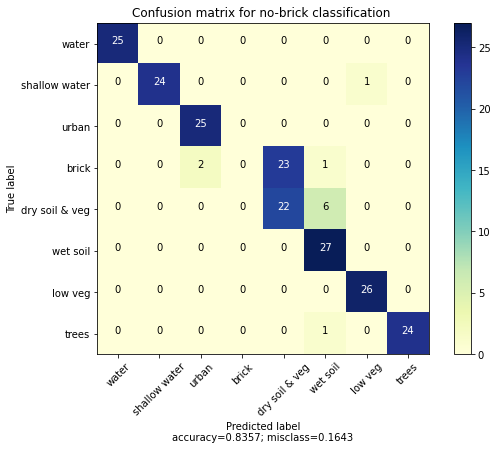

In [33]:
#labels2=['water','shallow water','urban','brick','dry soil & veg','wet soil','low veg','trees']
p_val2 = np.loadtxt(trainpath+'validation3.txt',dtype='int')
p_val2.shape
pred_rf2 = Y_im_rf2[p_val2[:,1],p_val2[:,0]]
ovAcc_rf2 = accuracy_score(p_val2[:,2],pred_rf2)
print("Overall accuracy for Random Forest: " + str(100*ovAcc_rf2) + "%")
confM_rf2 = confusion_matrix(p_val2[:,2],pred_rf2)
plot_confusion_matrix(confM_rf2,labels,title='Confusion matrix for no-brick classification ',cmap='YlGnBu', normalize=False)

Creating NDVI image with costum colomap

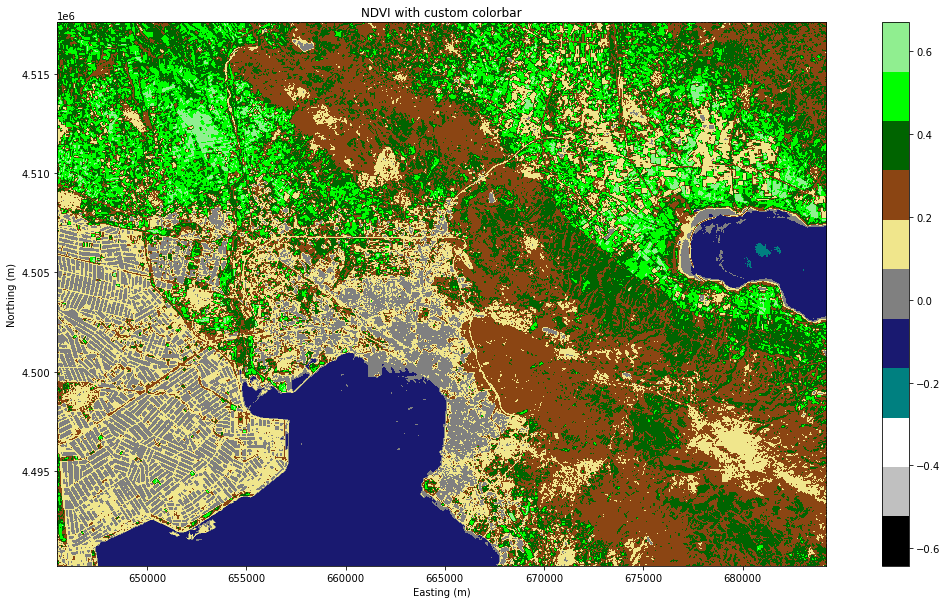

In [136]:
ndvi=rio.open(os.path.join(resampled, 'undvi.tif'))
ccm3=ListedColormap(["black","silver","white","teal","midnightblue","grey","khaki","saddlebrown","darkgreen","lime","lightgreen"])
fig, ax = plt.subplots(figsize=(20,10))
data=ndvi.read()
show(data , transform=ndvi.transform, ax=ax, cmap=ccm3)
plt.title("NDVI with custom colormap")
plt.ylabel('Northing (m)')
plt.xlabel('Easting (m)')
fig.colorbar( cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(data), vmax=np.nanmax(data)), cmap=ccm3), ax=ax)
